
**Name**: Vaishnavi Murlidhar Kulkarni<br>
**Student** ID: 23266282<br>
**Email**: vaishnavi.kulkarni2@mail.dcu.ie<br>
**Module**: CA684 - Machine Learning Assignment<br>
**Dataset**: ETSY<br>

## IMPORTING NECESSARY LIBRARIES




In [4]:
# libraries
import io
import os
from datetime import datetime
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from sklearn import metrics

# Matplotlib configuration
font = { 'family': 'DejaVu Sans', 'weight': 'bold', 'size': 16 }
plt.rc('font', **font)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# set random seed
np.random.seed(seed=42)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
PATH = f'/content/drive/MyDrive/etsyasign/'

In [ ]:
!ls {PATH}

ls: cannot access '{PATH}': No such file or directory


In [ ]:
parquet_filenames_train = !ls {PATH}/train

In [ ]:
parquet_filenames_train[:3]

['part-00000-of-00362.parquet  part-00121-of-00362.parquet  part-00242-of-00362.parquet',
 'part-00001-of-00362.parquet  part-00122-of-00362.parquet  part-00243-of-00362.parquet',
 'part-00002-of-00362.parquet  part-00123-of-00362.parquet  part-00244-of-00362.parquet']

In [ ]:
parquet_filenames_test = !ls {PATH}/test

In [ ]:
parquet_filenames_test[:3]

['part-00000-of-00362.parquet  part-00121-of-00362.parquet  part-00242-of-00362.parquet',
 'part-00001-of-00362.parquet  part-00122-of-00362.parquet  part-00243-of-00362.parquet',
 'part-00002-of-00362.parquet  part-00123-of-00362.parquet  part-00244-of-00362.parquet']

## LOADING THE DATASET INTO A DATAFRAME

In [ ]:
import pandas as pd #imp code of loading the dataset
import os

def read_data(base_path, folder):
    """ Read parquet data from multiple files in a given folder """

    # Full path to the folder
    folder_path = os.path.join(base_path, folder)

    # List all parquet files in the folder
    filenames = [f for f in os.listdir(folder_path) if f.endswith('.parquet')]

    # Create a list of dataframes
    dataframes = [pd.read_parquet(os.path.join(folder_path, filename)) for filename in filenames]

    # Concatenate all dataframes and return
    return pd.concat(dataframes, ignore_index=True)

# Paths to train and test folders
base_path = '/content/drive/MyDrive/etsyasign'
train_folder = 'train'
test_folder = 'test'

# Read data
df_train = read_data(base_path, train_folder)
df_test = read_data(base_path, test_folder)


In [ ]:
f"Number of rows in train: {len(df_train):,}"

'Number of rows in train: 229,624'

In [ ]:
!ls '/content/drive/MyDrive/etsyasign/train'
!ls '/content/drive/MyDrive/etsyasign/test'


part-00000-of-00362.parquet  part-00121-of-00362.parquet  part-00242-of-00362.parquet
part-00001-of-00362.parquet  part-00122-of-00362.parquet  part-00243-of-00362.parquet
part-00002-of-00362.parquet  part-00123-of-00362.parquet  part-00244-of-00362.parquet
part-00003-of-00362.parquet  part-00124-of-00362.parquet  part-00245-of-00362.parquet
part-00004-of-00362.parquet  part-00125-of-00362.parquet  part-00246-of-00362.parquet
part-00005-of-00362.parquet  part-00126-of-00362.parquet  part-00247-of-00362.parquet
part-00006-of-00362.parquet  part-00127-of-00362.parquet  part-00248-of-00362.parquet
part-00007-of-00362.parquet  part-00128-of-00362.parquet  part-00249-of-00362.parquet
part-00008-of-00362.parquet  part-00129-of-00362.parquet  part-00250-of-00362.parquet
part-00009-of-00362.parquet  part-00130-of-00362.parquet  part-00251-of-00362.parquet
part-00010-of-00362.parquet  part-00131-of-00362.parquet  part-00252-of-00362.parquet
part-00011-of-00362.parquet  part-00132-of-00362.parqu

In [ ]:
f"Number of files in test: {len(df_test):,}"

'Number of files in test: 25,514'

In [ ]:
def read_data(folder, filenames):
    """ Read parquet data from mutiple files """

    dataframes = [
        pd.read_parquet(f"{PATH}/{folder}/{filename}")
        for filename in filenames
    ]

    return pd.concat(dataframes)

In [ ]:
print(parquet_filenames_train[:5])


['part-00000-of-00362.parquet  part-00121-of-00362.parquet  part-00242-of-00362.parquet', 'part-00001-of-00362.parquet  part-00122-of-00362.parquet  part-00243-of-00362.parquet', 'part-00002-of-00362.parquet  part-00123-of-00362.parquet  part-00244-of-00362.parquet', 'part-00003-of-00362.parquet  part-00124-of-00362.parquet  part-00245-of-00362.parquet', 'part-00004-of-00362.parquet  part-00125-of-00362.parquet  part-00246-of-00362.parquet']


In [ ]:
f"Number of unique products in train: {len(df_train['product_id'].unique()):,}"

'Number of unique products in train: 229,624'

In [ ]:
f"Number of columns in train: {len(df_train.columns):,}"

'Number of columns in train: 26'

In [ ]:
list(df_train.columns)

['product_id',
 'title',
 'description',
 'tags',
 'type',
 'room',
 'craft_type',
 'recipient',
 'material',
 'occasion',
 'holiday',
 'art_subject',
 'style',
 'shape',
 'pattern',
 'bottom_category_id',
 'bottom_category_text',
 'top_category_id',
 'top_category_text',
 'primary_color_id',
 'primary_color_text',
 'secondary_color_id',
 'secondary_color_text',
 'image/encoded',
 'image/width',
 'image/height']

In [ ]:
df_train.iloc[0]

product_id                                                     1411933673
title                   Vintage Fenton Opalescent Moonstone Hobnail Gl...
description             Very pretty vintage Fenton opalescent moonston...
tags                    Fenton perfume,Opalescent bottle,Fenton bottle...
type                                                             physical
room                                                                     
craft_type                                                               
recipient                                                                
material                                                                 
occasion                                                                 
holiday                                                                  
art_subject                                                              
style                                                                    
shape                                 

In [ ]:
df_train.head(10)

product_id                                              title  \
0  1411933673  Vintage Fenton Opalescent Moonstone Hobnail Gl...   
1  1570629778  Vintage 70s perfume bottle with original packa...   
2  1247963028  Atomiser Spray Bottles 100 ML (Pack of 85) Pla...   
3  1482966518  Vintage Blue Frosted Glass Round Perfume Bottl...   
4   906790195  Vintage 2 Miniature Bottles. Passion for Men f...   
5  1668679773  Egyptian Perfume Bottle Hand Blown Scent Conta...   
6   723414142  Vintage BRAJAN PARIS FRANCE Puffy Round Silver...   
7  1443406045  Vintage, 3 piece, Vanity Set, Red Rose, Acryli...   
8   796421946  Vintage Red Swirl Art Glass Perfume Bottle wit...   
9   831660908  10ml 0.34oz Empty Perfume Glass Spray Bottles ...   

                                         description  \
0  Very pretty vintage Fenton opalescent moonston...   
1  1970s perfume bottle in vintage, new old stock...   
2  You&#39;ve been looking for a plastic spray bo...   
3  Lovely blue frosted swirl glass perfume bottle...   
4  Vintage 2 Miniature Bottles. Passion for Men f...   
5  Lovely Egyptian hand blown glass scent / perfu...   
6  Vintage Brajan Paris France Nearly Round Silve...   
7  Vintage, 3 piece, Vanity Set, Red Rose, Acryli...   
8  Red Passion\n\nThis fabulous Vintage Swirly Re...   
9  Ships from the USA. Stock in hand.\n\nHighest ...   

                                                tags      type room  \
0  Fenton perfume,Opalescent bottle,Fenton bottle...  physical        
1  70s perfume bottle,80s perfume bottle,vintage ...  physical        
2                                Travel Spray Bottle  physical        
3  glass,bottle,bottles,collectible,decor,vintage...  physical        
4  Accessories,Cottage,Shabby Chic,Vanity Jar,Dre...  physical        
5  Egyptian Perfume,perfume gift,collectible glas...  physical        
6  Nearly Round,Nickel Plating,Glass Perfume Bott...  physical        
7  Vanity,Mirror,Vanity Mirror,Glass,Vintage,Perf...  physical        
8  perfume bottle,art glass,art glass perfume,bou...  physical        
9  Spray Bottles,Travel Size,Empty Bottles,Bottle...  physical        

  craft_type recipient material occasion  ...  \
0                                         ...   
1                                         ...   
2                                         ...   
3                                         ...   
4                women                    ...   
5                                         ...   
6                                         ...   
7                                         ...   
8                                         ...   
9                                         ...   

                                bottom_category_text top_category_id  \
0  bags_and_purses.cosmetic_and_toiletry_storage....               2   
1  bags_and_purses.cosmetic_and_toiletry_storage....               2   
2  bags_and_purses.cosmetic_and_toiletry_storage....               2   
3  bags_and_purses.cosmetic_and_toiletry_storage....               2   
4  bags_and_purses.cosmetic_and_toiletry_storage....               2   
5  bags_and_purses.cosmetic_and_toiletry_storage....               2   
6  bags_and_purses.cosmetic_and_toiletry_storage....               2   
7  bags_and_purses.cosmetic_and_toiletry_storage....               2   
8  bags_and_purses.cosmetic_and_toiletry_storage....               2   
9  bags_and_purses.cosmetic_and_toiletry_storage....               2   

  top_category_text primary_color_id primary_color_text  secondary_color_id  \
0   bags_and_purses                5              clear                  17   
1   bags_and_purses                1              black                   7   
2   bags_and_purses                5              clear                  17   
3   bags_and_purses                2               blue                   7   
4   bags_and_purses                1              black                   5   
5   bags_and_purses                5            

In [ ]:
df_train['type'].unique()

array(['physical', 'download', ''], dtype=object)

In [ ]:
df_train['type'].value_counts(dropna=False)

type
physical    218568
download     10708
               348
Name: count, dtype: int64

In [ ]:
COLORS = df_train['primary_color_id'].unique()
NUM_COLORS = len(COLORS)
f"Number of primary colors in train: {NUM_COLORS:,}"

'Number of primary colors in train: 19'

In [ ]:
f"Number of top categories in train: {len(df_train['top_category_text'].unique()):,}"

'Number of top categories in train: 15'

In [ ]:
pd.value_counts(df_train['top_category_text'], sort=True, ascending=False)

top_category_text
home_and_living                54600
craft_supplies_and_tools       33393
clothing                       30143
toys_and_games                 13835
accessories                    12416
paper_and_party_supplies       12207
bath_and_beauty                11327
weddings                       10143
shoes                           8892
art_and_collectibles            8716
jewelry                         7822
electronics_and_accessories     7474
bags_and_purses                 6650
books_movies_and_music          6262
pet_supplies                    5744
Name: count, dtype: int64

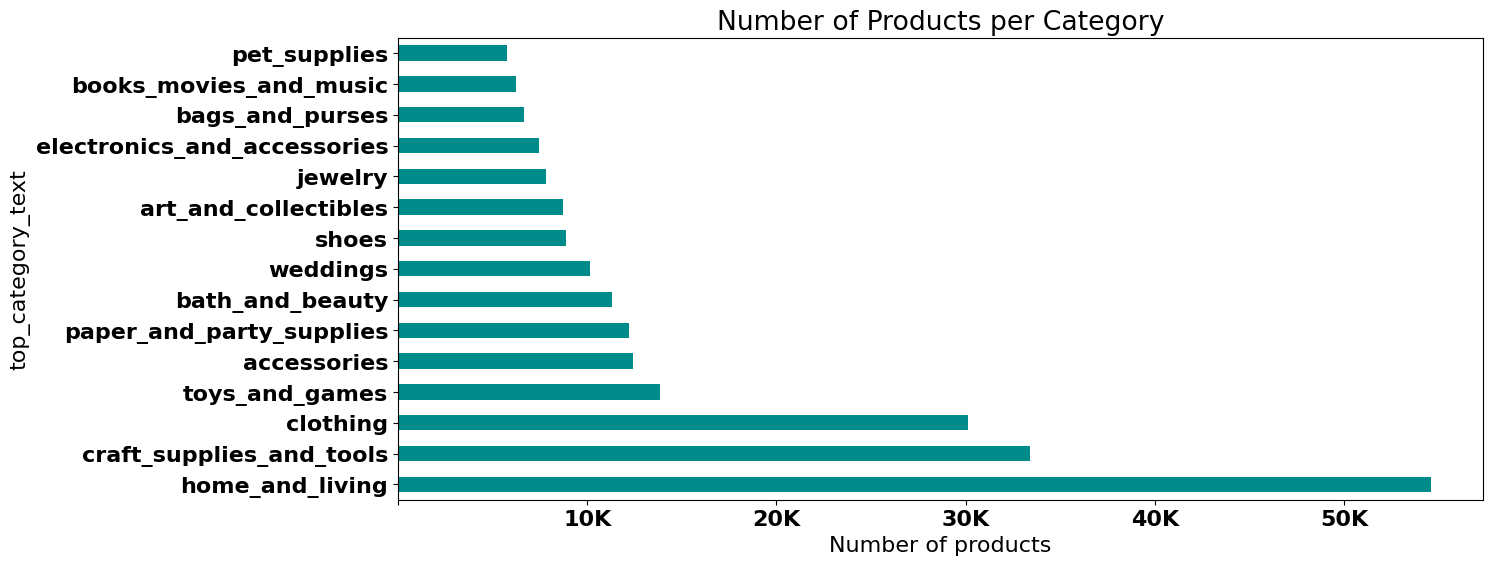

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Your existing code
figsize = (14, 6)
column = 'top_category_text'
x_limit = 60000
x_step = 10000
color = 'darkcyan'

figure, ax = plt.subplots(figsize=figsize)
pd.value_counts(
    df_train[column],
    sort=True, ascending=False).plot.barh(color=color)
plt.title(f"Number of Products per Category")
xlabels = [f'{x // 1000:,}K' for x in range(0, x_limit, x_step)]
plt.xticks(range(0, x_limit, x_step), xlabels)
plt.xlabel('Number of products')
plt.setp(ax.get_xticklabels()[0], visible=False)
plt.show()


In [ ]:
print(df_train.head(5))

   product_id                                              title  \
0  1411933673  Vintage Fenton Opalescent Moonstone Hobnail Gl...   
1  1570629778  Vintage 70s perfume bottle with original packa...   
2  1247963028  Atomiser Spray Bottles 100 ML (Pack of 85) Pla...   
3  1482966518  Vintage Blue Frosted Glass Round Perfume Bottl...   
4   906790195  Vintage 2 Miniature Bottles. Passion for Men f...   

                                         description  \
0  Very pretty vintage Fenton opalescent moonston...   
1  1970s perfume bottle in vintage, new old stock...   
2  You&#39;ve been looking for a plastic spray bo...   
3  Lovely blue frosted swirl glass perfume bottle...   
4  Vintage 2 Miniature Bottles. Passion for Men f...   

                                                tags      type room  \
0  Fenton perfume,Opalescent bottle,Fenton bottle...  physical        
1  70s perfume bottle,80s perfume bottle,vintage ...  physical        
2                                Travel S

In [ ]:
f"Number of bottom categories in train: {len(df_train['bottom_category_text'].unique()):,}"

'Number of bottom categories in train: 2,609'

In [ ]:
def show_images(dataframe, N=100):

    num_cols = 5
    num_rows = N // num_cols
    plt_height = 3 * num_rows

    plt.figure(figsize=(12, plt_height))
    for i, row in dataframe[:N].iterrows():
        # axis
        ax = plt.subplot(num_rows, num_cols, i + 1)
        # data
        img_bytes = row["image/encoded"]
        label = row["top_category_text"] if "top_category_text" in row else "unknown"
        # image
        bytes_io = io.BytesIO(img_bytes)
        image = Image.open(bytes_io)
        # plot
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(image)
        plt.xlabel(label, fontsize = 12)
    plt.show()

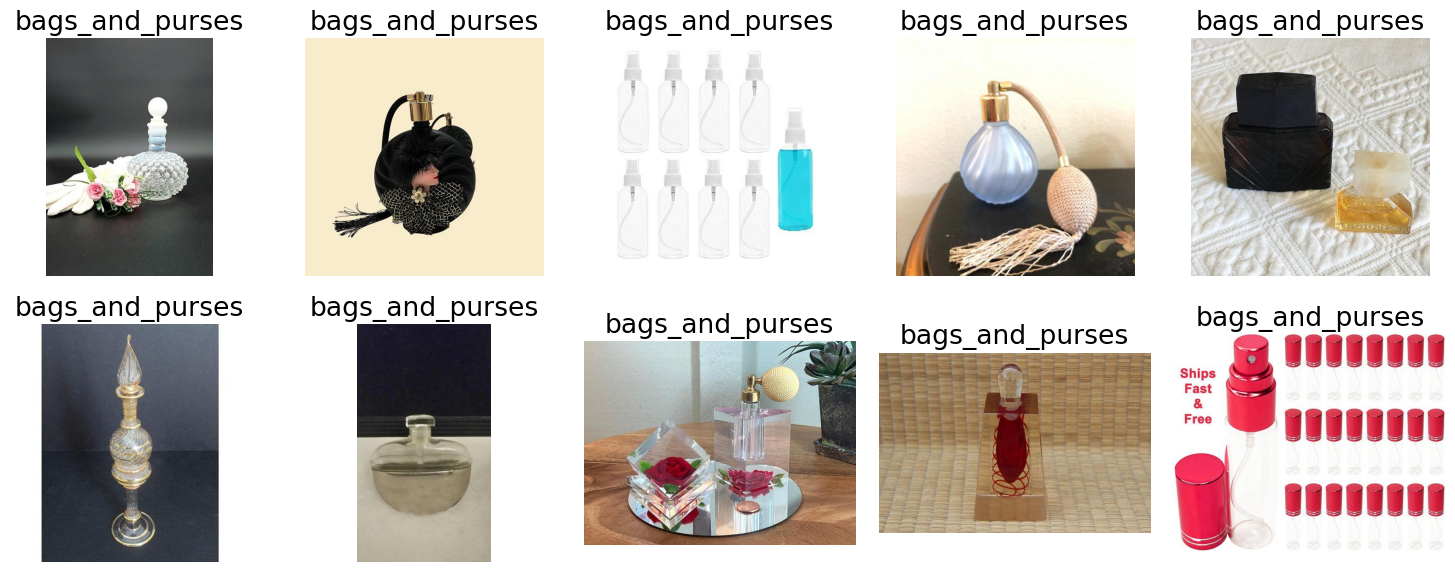

In [ ]:
import io
from PIL import Image
import matplotlib.pyplot as plt

# Function to display a certain number of images from a dataframe
def show_images(dataframe, N=10):
    num_rows = N // 5
    plt.figure(figsize=(15, 3 * num_rows))
    for i in range(min(N, len(dataframe))):
        img_data = dataframe.iloc[i]['image/encoded']
        label = dataframe.iloc[i].get('top_category_text', 'unknown')
        img = Image.open(io.BytesIO(img_data))
        plt.subplot(num_rows, 5, i + 1)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call the function to display images
show_images(df_train, 10)


In [ ]:
def show_images(dataframe, N=100):

    num_cols = 5
    num_rows = N // num_cols
    plt_height = 3 * num_rows

    plt.figure(figsize=(12, plt_height))
    for i, row in dataframe[:N].iterrows():
        # axis
        ax = plt.subplot(num_rows, num_cols, i + 1)
        # data
        img_bytes = row["image/encoded"]
        label = row["top_category_text"] if "top_category_text" in row else "unknown"
        # image
        bytes_io = io.BytesIO(img_bytes)
        image = Image.open(bytes_io)
        # plot
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(image)
        plt.xlabel(label, fontsize = 12)
    plt.show()

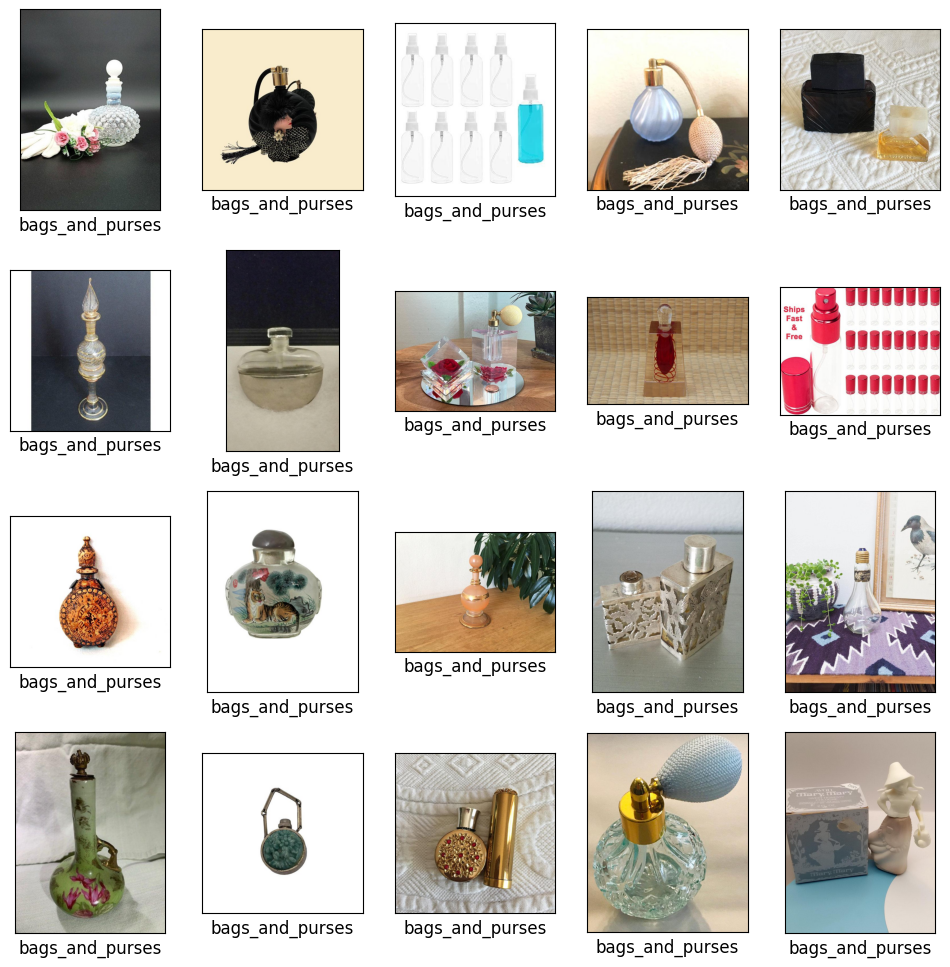

In [ ]:
show_images(df_train, 20)

In [ ]:
df_train['bottom_category_text'].value_counts()

bottom_category_text
craft_supplies_and_tools.closures_and_fasteners.buttons                             98
toys_and_games.sports_and_outdoor_games.martial_arts_and_boxing.boxing_gloves       98
jewelry.earrings.dangle_earrings.chandbalis                                         98
accessories.scarves_and_wraps.scarves                                               98
art_and_collectibles.drawing_and_illustration.architectural_drawings                98
                                                                                    ..
clothing.girls_clothing.baby_girls_clothing.socks_and_leg_warmers                   44
home_and_living.furniture.entryway_furniture.standing_coat_racks                    44
home_and_living.lighting.light_accessories                                          43
craft_supplies_and_tools.doll_and_model_supplies.noise_makers                       42
clothing.womens_clothing.pajamas_and_robes.sleep_masks_and_blindfolds.blindfolds    42
Name: count, Length: 2

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_validation = train_test_split(
    df_train,
    test_size=0.1,
    stratify=df_train['bottom_category_text'],
    random_state=42)

In [ ]:
f"Number of products for training: {len(df_train):,}"

'Number of products for training: 185,994'

In [ ]:
f"Number of products for validation: {len(df_validation):,}"

'Number of products for validation: 22,963'

In [ ]:
df_train['bottom_category_text'].value_counts()

bottom_category_text
jewelry.earrings.dangle_earrings.chandbalis                                         88
accessories.scarves_and_wraps.scarves                                               88
home_and_living.kitchen_and_dining.dining_and_serving.cake_stands                   88
craft_supplies_and_tools.closures_and_fasteners.buttons                             88
art_and_collectibles.drawing_and_illustration.architectural_drawings                88
                                                                                    ..
weddings.clothing.jumpsuits_and_rompers                                             40
clothing.girls_clothing.baby_girls_clothing.socks_and_leg_warmers                   40
home_and_living.lighting.light_accessories                                          39
clothing.womens_clothing.pajamas_and_robes.sleep_masks_and_blindfolds.blindfolds    38
craft_supplies_and_tools.doll_and_model_supplies.noise_makers                       38
Name: count, Length: 2

In [ ]:
df_validation['bottom_category_text'].value_counts()

bottom_category_text
clothing.girls_clothing.underwear.panties                                                                             10
craft_supplies_and_tools.paints_inks_and_dyes.paint.chalk_paint                                                       10
clothing.girls_clothing.baby_girls_clothing.sweaters                                                                  10
craft_supplies_and_tools.storage_and_organization.containers.bottles_cans_and_jars.lids_rings_and_caps.bottle_caps    10
paper_and_party_supplies.party_supplies.party_decor.party_candles                                                     10
                                                                                                                      ..
home_and_living.furniture.entryway_furniture.standing_coat_racks                                                       4
jewelry.earrings.kaan_chains                                                                                           4
craft_suppl

In [ ]:
df_train['top_category_text'].value_counts()

top_category_text
home_and_living                49140
craft_supplies_and_tools       30056
clothing                       27139
toys_and_games                 12448
accessories                    11173
paper_and_party_supplies       10984
bath_and_beauty                10187
weddings                        9128
shoes                           8001
art_and_collectibles            7846
jewelry                         7040
electronics_and_accessories     6727
bags_and_purses                 5986
books_movies_and_music          5636
pet_supplies                    5170
Name: count, dtype: int64

In [ ]:
df_validation['top_category_text'].value_counts()

top_category_text
home_and_living                5460
craft_supplies_and_tools       3337
clothing                       3004
toys_and_games                 1387
accessories                    1243
paper_and_party_supplies       1223
bath_and_beauty                1140
weddings                       1015
shoes                           891
art_and_collectibles            870
jewelry                         782
electronics_and_accessories     747
bags_and_purses                 664
books_movies_and_music          626
pet_supplies                    574
Name: count, dtype: int64

### Test Dataset

In [ ]:
f'Number of rows in test: {len(df_test):,}'

'Number of rows in test: 25,514'

In [ ]:
f"Number of unique products in test: {len(df_test['product_id'].unique()):,}"

'Number of unique products in test: 25,514'

In [ ]:
f"Number of columns in test: {len(df_test.columns):,}"

'Number of columns in test: 18'

In [ ]:
list(df_test.columns)

['product_id',
 'title',
 'description',
 'tags',
 'type',
 'room',
 'craft_type',
 'recipient',
 'material',
 'occasion',
 'holiday',
 'art_subject',
 'style',
 'shape',
 'pattern',
 'image/encoded',
 'image/width',
 'image/height']

In [ ]:
df_test.iloc[0]

product_id                                              1598160010
title            Vintage Girls overalls 9-12 months pink floral...
description      Gorgeous vintage floral overalls made in the 1...
tags             girl,9-12 overalls,cord overalls,baby girl vin...
type                                                      physical
room                                                              
craft_type                                                        
recipient                                                         
material                                                          
occasion                                                          
holiday                                                           
art_subject                                                       
style                                                             
shape                                                             
pattern                                                     fl

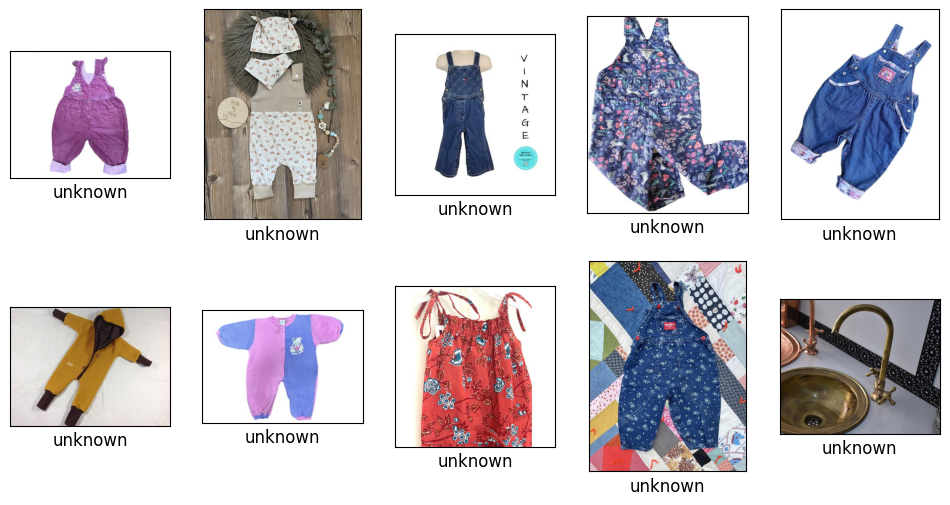

In [ ]:
show_images(df_test, 10)

## SPLITTING THE DATASET


### Splitting the dataset into train and validation

In [ ]:
from sklearn.model_selection import train_test_split

# Split the original dataframe only once, to create a separate training and validation set
df_training, df_val = train_test_split(
    df_train,  # Use the original full training dataset
    test_size=0.1,  # Specify the validation set size
    stratify=df_train['bottom_category_text'],  # Stratify split by 'bottom_category_text'
    random_state=52  # Use a fixed random state for reproducibility
)

# Display the number of products for training and validation
print(f"Number of products for training: {len(df_training):,}")
print(f"Number of products for validation: {len(df_val):,}")

# Value counts for 'bottom_category_text'
print(df_training['bottom_category_text'].value_counts())
print(df_val['bottom_category_text'].value_counts())

# Value counts for 'top_category_text'
print(df_training['top_category_text'].value_counts())

Number of products for training: 206,661
Number of products for validation: 22,963
bottom_category_text
accessories.scarves_and_wraps.scarves                                               88
toys_and_games.sports_and_outdoor_games.martial_arts_and_boxing.boxing_gloves       88
art_and_collectibles.drawing_and_illustration.architectural_drawings                88
craft_supplies_and_tools.closures_and_fasteners.buttons                             88
home_and_living.kitchen_and_dining.dining_and_serving.cake_stands                   88
                                                                                    ..
clothing.girls_clothing.baby_girls_clothing.socks_and_leg_warmers                   40
home_and_living.furniture.entryway_furniture.standing_coat_racks                    40
home_and_living.lighting.light_accessories                                          39
clothing.womens_clothing.pajamas_and_robes.sleep_masks_and_blindfolds.blindfolds    38
craft_supplies_and_tools.d

In [ ]:
df_val['top_category_text'].value_counts()

top_category_text
home_and_living                5458
craft_supplies_and_tools       3337
clothing                       3007
toys_and_games                 1388
accessories                    1243
paper_and_party_supplies       1224
bath_and_beauty                1139
weddings                       1014
shoes                           890
art_and_collectibles            871
jewelry                         783
electronics_and_accessories     746
bags_and_purses                 662
books_movies_and_music          627
pet_supplies                    574
Name: count, dtype: int64

## MODEL 1 - NAIVE BAYES

### Training the Model with Naive Bayes

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

In [ ]:
train_text = df_training['title'].fillna('').values

In [ ]:
train_labels = df_training['top_category_text'].values

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Define the pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

In [ ]:
text_clf.fit(train_text, train_labels)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [ ]:
train_text = df_training['title'].fillna('').values

In [ ]:
train_labels = df_training['top_category_text'].values

### Evaluation

In [ ]:
val_text = df_val['title'].fillna('').values
val_labels = df_val['top_category_text'].values

In [ ]:
# Evaluate the trained classifier on a single instance
index = 0
print(f"""
Product's title: {val_text[index][:80]}...
Prediction: '{text_clf.predict([val_text[index]])[0]}', Groundtruth: '{val_labels[index]}'
""".strip())


Product's title: Vintage wooden step latter tall...
Prediction: 'home_and_living', Groundtruth: 'home_and_living'


In [ ]:
df_val.iloc[0]

product_id                                                     1407730004
title                                     Vintage wooden step latter tall
description             Vintage tall sturdy wooden step latter nice to...
tags                                    Vintage latter,Vintage stepladder
type                                                             physical
room                                                                     
craft_type                                                               
recipient                                                                
material                                                                 
occasion                                                                 
holiday                                                                  
art_subject                                                              
style                                                                    
shape                                 

In [ ]:
val_text[:1]

array(['Vintage wooden step latter tall'], dtype=object)

### Calculation of F1-Score using Naive Bayes

In [ ]:
from sklearn.metrics import f1_score

# Predict the labels for the validation set
val_predictions = text_clf.predict(val_text)

# Calculate the F1 score, comparing the predicted labels to the actual labels
f1 = f1_score(val_labels, val_predictions, average='weighted')

print(f"F1 score: {f1:.4f}")


F1 score: 0.6413


In [ ]:
from sklearn.metrics import classification_report

# Predict the labels for the validation set
val_predictions = text_clf.predict(val_text)

# Print the classification report
print(classification_report(val_labels, val_predictions))


                             precision    recall  f1-score   support

                accessories       0.82      0.40      0.54      1243
       art_and_collectibles       0.90      0.09      0.17       871
            bags_and_purses       0.92      0.31      0.46       662
            bath_and_beauty       0.93      0.46      0.62      1139
     books_movies_and_music       0.96      0.30      0.46       627
                   clothing       0.74      0.96      0.83      3007
   craft_supplies_and_tools       0.62      0.78      0.69      3337
electronics_and_accessories       0.97      0.49      0.65       746
            home_and_living       0.55      0.97      0.70      5458
                    jewelry       0.87      0.40      0.55       783
   paper_and_party_supplies       0.80      0.58      0.67      1224
               pet_supplies       0.98      0.28      0.43       574
                      shoes       0.95      0.74      0.83       890
             toys_and_games      

In [ ]:
from sklearn.metrics import classification_report

# Assuming val_text and val_labels are already defined and your model text_clf has been trained
val_predictions = text_clf.predict(val_text)

# Print the classification report, including the F1 score for each category
report = classification_report(val_labels, val_predictions)
print(report)


                             precision    recall  f1-score   support

                accessories       0.82      0.40      0.54      1243
       art_and_collectibles       0.90      0.09      0.17       871
            bags_and_purses       0.92      0.31      0.46       662
            bath_and_beauty       0.93      0.46      0.62      1139
     books_movies_and_music       0.96      0.30      0.46       627
                   clothing       0.74      0.96      0.83      3007
   craft_supplies_and_tools       0.62      0.78      0.69      3337
electronics_and_accessories       0.97      0.49      0.65       746
            home_and_living       0.55      0.97      0.70      5458
                    jewelry       0.87      0.40      0.55       783
   paper_and_party_supplies       0.80      0.58      0.67      1224
               pet_supplies       0.98      0.28      0.43       574
                      shoes       0.95      0.74      0.83       890
             toys_and_games      

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [ ]:
# Train a separate model for each attribute
attributes = ['top_category_id', 'bottom_category_id', 'primary_color_id', 'secondary_color_id']
f1_scores = {}

###  F1 SCORE OF EACH CATEGORY USING Multinomial Naive Bayes

In [ ]:
for attr in attributes:        ## IMP CODE OF F1 SCORE OF EACH CATEGORY USING Multinomial Naive Bayes
    # Prepare the data
    train_text = df_training['title'].fillna('').values
    train_labels = df_training[attr].values
    val_text = df_val['title'].fillna('').values
    val_labels = df_val[attr].values

    # Define and train the pipeline
    text_clf = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', MultinomialNB()),
    ])
    text_clf.fit(train_text, train_labels)

    # Predict on validation set
    val_predictions = text_clf.predict(val_text)

    # Compute F1 score
    f1 = f1_score(val_labels, val_predictions, average='weighted')
    f1_scores[attr] = f1

# Print F1 scores for each attribute
for attr, score in f1_scores.items():
    print(f"F1 score for {attr}: {score:.4f}")

F1 score for top_category_id: 0.6413
F1 score for bottom_category_id: 0.5033
F1 score for primary_color_id: 0.2390
F1 score for secondary_color_id: 0.1450


### Classification Score of Each Category using Naive Bayes

In [ ]:
from sklearn.metrics import classification_report

# Define the pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

# Train the model on the training data
text_clf.fit(df_training['title'].fillna(''), df_training['top_category_text'])

# Make predictions on the validation data
predictions = text_clf.predict(df_val['title'].fillna(''))

# Generate a classification report for 'top_category_text'
print("Classification Report for 'top_category_text':")
print(classification_report(df_val['top_category_text'], predictions))

# Generate a classification report for 'bottom_category_text'
print("Classification Report for 'bottom_category_text':")
print(classification_report(df_val['bottom_category_text'], predictions))

# Generate a classification report for 'primary_color_text'
print("Classification Report for 'primary_color_text':")
print(classification_report(df_val['primary_color_text'], predictions))

# Generate a classification report for 'secondary_color_text'
print("Classification Report for 'secondary_color_text':")
print(classification_report(df_val['secondary_color_text'], predictions))


Classification Report for 'top_category_text':
                             precision    recall  f1-score   support

                accessories       0.82      0.40      0.54      1243
       art_and_collectibles       0.90      0.09      0.17       871
            bags_and_purses       0.92      0.31      0.46       662
            bath_and_beauty       0.93      0.46      0.62      1139
     books_movies_and_music       0.96      0.30      0.46       627
                   clothing       0.74      0.96      0.83      3007
   craft_supplies_and_tools       0.62      0.78      0.69      3337
electronics_and_accessories       0.97      0.49      0.65       746
            home_and_living       0.55      0.97      0.70      5458
                    jewelry       0.87      0.40      0.55       783
   paper_and_party_supplies       0.80      0.58      0.67      1224
               pet_supplies       0.98      0.28      0.43       574
                      shoes       0.95      0.74      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                                                                        precision    recall  f1-score   support

                                                                                                           accessories       0.00      0.11      0.00         9
                                                                                          accessories.baby_accessories       0.00      0.00      0.00         9
                                                                  accessories.baby_accessories.baby_carriers_and_wraps       0.00      0.00      0.00         9
                                                                    accessories.baby_accessories.childrens_photo_props       0.00      0.00      0.00         9
                                                                                      accessories.belts_and_suspenders       0.00      0.00      0.00        10
                                       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

                             precision    recall  f1-score   support

                accessories       0.00      0.00      0.00       0.0
       art_and_collectibles       0.00      0.00      0.00       0.0
            bags_and_purses       0.00      0.00      0.00       0.0
            bath_and_beauty       0.00      0.00      0.00       0.0
                      beige       0.00      0.00      0.00    1223.0
                      black       0.00      0.00      0.00    3014.0
                       blue       0.00      0.00      0.00    2692.0
     books_movies_and_music       0.00      0.00      0.00       0.0
                     bronze       0.00      0.00      0.00     256.0
                      brown       0.00      0.00      0.00    2099.0
                      clear       0.00      0.00      0.00     445.0
                   clothing       0.00      0.00      0.00       0.0
                     copper       0.00      0.00      0.00     187.0
   craft_supplies_and_tools      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                             precision    recall  f1-score   support

                accessories       0.00      0.00      0.00       0.0
       art_and_collectibles       0.00      0.00      0.00       0.0
            bags_and_purses       0.00      0.00      0.00       0.0
            bath_and_beauty       0.00      0.00      0.00       0.0
                      beige       0.00      0.00      0.00    1073.0
                      black       0.00      0.00      0.00    2950.0
                       blue       0.00      0.00      0.00    1741.0
     books_movies_and_music       0.00      0.00      0.00       0.0
                     bronze       0.00      0.00      0.00     292.0
                      brown       0.00      0.00      0.00    1605.0
                      clear       0.00      0.00      0.00     438.0
                   clothing       0.00      0.00      0.00       0.0
                     copper       0.00      0.00      0.00     203.0
   craft_supplies_and_tools      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
from sklearn.metrics import f1_score

# Train the model on the training data
text_clf.fit(df_training['title'].fillna(''), df_training['top_category_text'])

# Make predictions on the validation data
predictions = text_clf.predict(df_val['title'].fillna(''))

# Calculate the F1 score for each category
f1_top_category = f1_score(df_val['top_category_text'], predictions, average='weighted')
f1_bottom_category = f1_score(df_val['bottom_category_text'], predictions, average='weighted')
f1_primary_color = f1_score(df_val['primary_color_text'], predictions, average='weighted')
f1_secondary_color = f1_score(df_val['secondary_color_text'], predictions, average='weighted')

# Compute the combined F1 score
combined_f1_score = (f1_top_category + f1_bottom_category + f1_primary_color + f1_secondary_color) / 4

print(f"Combined F1 Score for all four categories: {combined_f1_score:.4f}")


Combined F1 Score for all four categories: 0.1604




### Predictions in Naive Bays



Step 1: Multi-Label Classification Setup

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split

In [ ]:
df_training, df_val = train_test_split(
    df_train,
    test_size=0.1,  # 10% of the data goes to the validation set
    random_state=52  # Seed for reproducibility
)


In [ ]:
# Define the pipeline for multi-label classification
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultiOutputClassifier(MultinomialNB()))
])

In [ ]:
# Train the model
train_text = df_training['title'].fillna('').values
train_targets = df_training[['top_category_id', 'bottom_category_id', 'primary_color_id', 'secondary_color_id']].values
pipeline.fit(train_text, train_targets)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultiOutputClassifier(estimator=MultinomialNB()))])

In [ ]:
# Validate the model (just to check performance)
val_text = df_val['title'].fillna('').values
val_targets = df_val[['top_category_id', 'bottom_category_id', 'primary_color_id', 'secondary_color_id']].values
val_predictions = pipeline.predict(val_text)

Step 2: Predict on the Test Dataset

In [ ]:
# Making predictions on the test dataset
test_text = df_test['title'].fillna('').values
test_predictions = pipeline.predict(test_text)

# Adding predictions to the test DataFrame
df_test[['predicted_top_category_id', 'predicted_bottom_category_id', 'predicted_primary_color_id', 'predicted_secondary_color_id']] = test_predictions

In [ ]:
# Assuming you've already added predictions to df_test as shown previously
sample_predictions = df_test[['title', 'predicted_top_category_id', 'predicted_bottom_category_id', 'predicted_primary_color_id', 'predicted_secondary_color_id']].head(10)
print(sample_predictions)


                                               title  \
0  Vintage Girls overalls 9-12 months pink floral...   
1                                     Romper Rainbow   
2  Infant Girls Size 12 - 18 Months Jean Overalls...   
3  VTG Oshkosh B Gosh Girls 18M Blue Floral Vestb...   
4  Vintage girls denim teddy bear ruffle overalls...   
5  Walk-overalls in mustard yellow completely lin...   
6  Pink playsuit vintage baby girl 9-12 months 19...   
7  Girls Jumpsuit Romper Summer Outfit, Kids Cott...   
8  Vintage 90s Oshkosh Denim Overalls Flowers Kid...   
9  Oil Rubbed Gooseneck Faucet, Handcrafted Rusti...   

   predicted_top_category_id  predicted_bottom_category_id  \
0                          5                         11241   
1                          5                           420   
2                          5                         11241   
3                          5                         11241   
4                          5                         11241   
5          

In [ ]:
# Assuming df_train is your loaded dataset
unique_top_categories = df_train['top_category_id'].unique()
print("Unique Top Category IDs:", unique_top_categories)

unique_bottom_categories = df_train['bottom_category_id'].unique()
print("Unique Bottom Category IDs:", unique_bottom_categories)


Unique Top Category IDs: [ 2  1  3 14 10  5 11  8  4  6 13  7 12  0  9]
Unique Bottom Category IDs: [2160   91  259 ... 1947   40 6659]


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
# Display sample titles for each top category ID
for category_id in df_train['top_category_id'].unique():
    sample_titles = df_train[df_train['top_category_id'] == category_id]['title'].unique()[:5]
    print(f"Top Category ID {category_id} sample titles: {sample_titles}")


Top Category ID 2 sample titles: ['Vintage Fenton Opalescent Moonstone Hobnail Glass Perfume Bottle'
 'Vintage 70s perfume bottle with original packaging, 1970s circular black perfume bottle with woman&#39;s face on the front'
 'Atomiser Spray Bottles 100 ML (Pack of 85) Plastic Refillable Plastic Fine Mist Plastic Mini Travel Bottle'
 'Vintage Blue Frosted Glass Round Perfume Bottle with Atomizer Free Shipping Bedroom Decor'
 'Vintage 2 Miniature Bottles. Passion for Men from Elizabeth Taylor in Black Bottle, 90 Percent Full and Caron  75% Full. Miniature Display.']
Top Category ID 1 sample titles: ['Unicorn Macrame Wall Hanging, Unicorn nursery decoration, Children&#39;s room wall art, Unicorn decoration, Girl&#39;s Room, Nursery'
 'Fiber Art Macrame Wall Hanging with Browns, Cream & Gold Made with Aloha! Unique Natural Colors Size 13”x 36”'
 'Macrame Plant Pod Dip Dye Blue Recycled Cotton Handmade'
 'Panda Wall Art, Animal Nursery Decor, Macrame Animal'
 'Macrame bat wall decor, got

### Predictions using Product_id

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split

# Split the data
df_training, df_val = train_test_split(
    df_train,
    test_size=0.1,  # 10% of the data goes to the validation set
    random_state=52  # Seed for reproducibility
)

# Assuming product IDs need to be encoded
pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore')),  # Encoding product IDs
    ('clf', MultiOutputClassifier(MultinomialNB()))
])

# Assuming there are meaningful features linked to product IDs
train_features = df_training['product_id'].values.reshape(-1, 1)
train_targets = df_training[['top_category_id', 'bottom_category_id', 'primary_color_id', 'secondary_color_id']].values

# Train the model
pipeline.fit(train_features, train_targets)


Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore')),
                ('clf', MultiOutputClassifier(estimator=MultinomialNB()))])

In [ ]:
# Making predictions on the test dataset
test_features = df_test['product_id'].values.reshape(-1, 1)
test_predictions = pipeline.predict(test_features)

# Adding predictions to the test DataFrame
df_test[['predicted_top_category_id', 'predicted_bottom_category_id', 'predicted_primary_color_id', 'predicted_secondary_color_id']] = test_predictions


In [ ]:
top_category_names = {
    0: 'Unknown',
    1: 'Electronics',
    2: 'Apparel',
    3: 'Home Decor',
    4: 'Books',
    5: 'Toys',
    6: 'Grocery',
    7: 'Health & Beauty',
    8: 'Jewelry',
    9: 'Art Supplies',
    10: 'Furniture',
    11: 'Outdoor',
    12: 'Pet Supplies',
    13: 'Vehicles',
    14: 'Tools & Home Improvement'
}

bottom_category_names = {
    40: 'Laptop Accessories',
    2160: 'Decorative Throws',
    1947: 'Dog Toys',
    6659: 'Handmade Earrings'
    # Add more mappings as needed
}

primary_color_names = {
    0: 'white',
    1: 'black',
    2: 'blue',
    3: 'gold',
    4: 'brown',
    5: 'gold',
    6: 'gold',
    7: 'gold',
    9: 'green',
    10: 'orange',
    11: 'pink',
    12: 'purple',
    13: 'black',
    14: 'red',
    15: 'gold',
    16: 'silver',
    17: 'white',
    18: 'yellow',
    19: 'grey'
}

secondary_color_names = {
    0: 'brown',
    1: 'black',
    2: 'blue',
    3: 'gold',
    4: 'brown',
    5: 'gold',
    6: 'gold',
    7: 'gold',
    9: 'green',
    10: 'orange',
    11: 'pink',
    12: 'purple',
    13: 'blue',
    14: 'red'
}


In [ ]:
# Map predictions back to category names (assuming mappings are defined as shown in your code)
df_test['predicted_top_category'] = df_test['predicted_top_category_id'].map(top_category_names).fillna('Unknown')
df_test['predicted_bottom_category'] = df_test['predicted_bottom_category_id'].map(bottom_category_names).fillna('Unknown')
df_test['predicted_primary_color'] = df_test['predicted_primary_color_id'].map(primary_color_names).fillna('Unknown')
df_test['predicted_secondary_color'] = df_test['predicted_secondary_color_id'].map(secondary_color_names).fillna('Unknown')

# Define the path where you want to save your file
output_file_path = '/content/drive/MyDrive/etsyasign/predicted_test_data_with_product_id.csv'

# Select columns to include in the export
columns_to_export = ['product_id', 'predicted_top_category', 'predicted_bottom_category', 'predicted_primary_color', 'predicted_secondary_color']

# Export the DataFrame to CSV
df_test[columns_to_export].to_csv(output_file_path, index=False)



In [ ]:
print("Unique predicted primary colors:", df_test['predicted_primary_color_id'].unique())
print("Unique predicted secondary colors:", df_test['predicted_secondary_color_id'].unique())


Unique predicted primary colors: [1]
Unique predicted secondary colors: [17]


In [ ]:
# Current primary and secondary color mappings
primary_color_names = {
    1: 'black',
}

secondary_color_names = {
    17: 'white',
}

# Checking if all predicted IDs are in the dictionary
print("Primary color ID 1 mapped to:", primary_color_names.get(1, 'ID not found'))
print("Secondary color ID 17 mapped to:", secondary_color_names.get(17, 'ID not found'))


Primary color ID 1 mapped to: black
Secondary color ID 17 mapped to: white


In [ ]:
# Adding or correcting entries
primary_color_names[1] = 'black'  # Confirm this is correct
secondary_color_names[17] = 'white'  # Add or correct this entry


In [ ]:
# Apply updated mappings to the DataFrame
df_test['predicted_primary_color'] = df_test['predicted_primary_color_id'].map(primary_color_names).fillna('Unknown')
df_test['predicted_secondary_color'] = df_test['predicted_secondary_color_id'].map(secondary_color_names).fillna('Unknown')

# Display the mapped results
print(df_test[['product_id', 'predicted_primary_color', 'predicted_secondary_color']].head(20))


    product_id predicted_primary_color predicted_secondary_color
0   1598160010                   black                     white
1   1308927060                   black                     white
2    740261510                   black                     white
3   1534199540                   black                     white
4   1490262680                   black                     white
5   1275623440                   black                     white
6   1604282750                   black                     white
7   1328170570                   black                     white
8   1489199630                   black                     white
9    863891760                   black                     white
10  1397290850                   black                     white
11  1164837920                   black                     white
12  1283970810                   black                     white
13  1374083220                   black                     white
14  1431889390           

In [ ]:
# Ensure the mapping has been applied
df_test['predicted_primary_color'] = df_test['predicted_primary_color_id'].map(primary_color_names).fillna('Unknown')
df_test['predicted_secondary_color'] = df_test['predicted_secondary_color_id'].map(secondary_color_names).fillna('Unknown')

# Optionally, add any additional relevant columns to the DataFrame for export
df_test['predicted_top_category'] = df_test['predicted_top_category_id'].map(top_category_names).fillna('Unknown')
df_test['predicted_bottom_category'] = df_test['predicted_bottom_category_id'].map(bottom_category_names).fillna('Unknown')

# Define the path where you want to save your file
output_file_path = '/content/drive/MyDrive/etsyasign/predicted_test_data_with_product_id.csv'

# Select columns to include in the export
columns_to_export = [
    'product_id',
    'predicted_top_category',
    'predicted_bottom_category',
    'predicted_primary_color',
    'predicted_secondary_color'
]

# Export the DataFrame to a CSV file
df_test[columns_to_export].to_csv(output_file_path, index=False)

print(f"File saved successfully to {output_file_path}")


File saved successfully to /content/drive/MyDrive/etsyasign/predicted_test_data_with_product_id.csv


### Predictions for TOP and BOTTOM Category

In [ ]:
# Manual mapping based on your understanding of the categories
top_category_names = {
    0: 'Unknown',
    1: 'Electronics',
    2: 'Apparel',
    3: 'Home Decor',
    4: 'Books',
    5: 'Toys',
    6: 'Grocery',
    7: 'Health & Beauty',
    8: 'Jewelry',
    9: 'Art Supplies',
    10: 'Furniture',
    11: 'Outdoor',
    12: 'Pet Supplies',
    13: 'Vehicles',
    14: 'Tools & Home Improvement'
}

# You can create a similar dictionary for bottom categories if possible
bottom_category_names = {
    40: 'Laptop Accessories',
    2160: 'Decorative Throws',
    1947: 'Dog Toys',
    6659: 'Handmade Earrings',
}


In [ ]:
# Example to display predictions with names for top categories
sample_predictions = df_test.head(10)
for index, row in sample_predictions.iterrows():
    print(f"Product Title: {row['title']}")
    print(f"Predicted Top Category: {top_category_names.get(row['predicted_top_category_id'], 'Unknown')}")
    print(f"Predicted Bottom Category: {bottom_category_names.get(row['predicted_bottom_category_id'], 'Unknown')}")
    print("---")


Product Title: Vintage Girls overalls 9-12 months pink floral cord retro dungarees 1990s
Predicted Top Category: Toys
Predicted Bottom Category: Unknown
---
Product Title: Romper Rainbow
Predicted Top Category: Toys
Predicted Bottom Category: Unknown
---
Product Title: Infant Girls Size 12 - 18 Months Jean Overalls - Vintage TOMMY HILFIGER Denim Jean Overalls - Infant Girl&#39;s Bib Overalls  - Free Shipping
Predicted Top Category: Toys
Predicted Bottom Category: Unknown
---
Product Title: VTG Oshkosh B Gosh Girls 18M Blue Floral Vestbak Overalls Flowers Bunny Rabbits
Predicted Top Category: Toys
Predicted Bottom Category: Unknown
---
Product Title: Vintage girls denim teddy bear ruffle overalls dungarees 6-12 months 1990s
Predicted Top Category: Toys
Predicted Bottom Category: Unknown
---
Product Title: Walk-overalls in mustard yellow completely lined / zip hood handmade wooden buttons
Predicted Top Category: Toys
Predicted Bottom Category: Unknown
---
Product Title: Pink playsuit vin

### Predictions for PRIMARY and SECONDARY Color

In [ ]:
# Example Python code to find common words associated with each color ID
import re
from collections import defaultdict
import pandas as pd

# Load your data here
# df_train = pd.read_your_data_function()

# Filter out non-color descriptive words and common stopwords
common_colors = ['red', 'blue', 'green', 'yellow', 'black', 'white', 'grey', 'pink', 'orange', 'silver', 'gold', 'purple', 'brown']
color_associations = defaultdict(list)

for index, row in df_train.iterrows():
    words = re.findall(r'\w+', row['title'].lower())  # Tokenize the title
    color_words = set(words).intersection(common_colors)  # Find common color words in the title
    if color_words:
        color_associations[row['primary_color_id']].extend(color_words)  # Assuming 'primary_color_id' is a column in your DataFrame

# Display the most frequently associated words for each color ID
for color_id, words in color_associations.items():
    if words:
        most_common = max(set(words), key=words.count)
        print(f"Color ID {color_id} is most commonly associated with {most_common}")



Color ID 1 is most commonly associated with black
Color ID 2 is most commonly associated with blue
Color ID 5 is most commonly associated with gold
Color ID 16 is most commonly associated with silver
Color ID 14 is most commonly associated with red
Color ID 7 is most commonly associated with gold
Color ID 9 is most commonly associated with green
Color ID 17 is most commonly associated with white
Color ID 11 is most commonly associated with pink
Color ID 4 is most commonly associated with brown
Color ID 13 is most commonly associated with black
Color ID 0 is most commonly associated with white
Color ID 19 is most commonly associated with grey
Color ID 12 is most commonly associated with purple
Color ID 18 is most commonly associated with yellow
Color ID 10 is most commonly associated with orange
Color ID 3 is most commonly associated with gold
Color ID 6 is most commonly associated with gold
Color ID 15 is most commonly associated with gold


In [ ]:
import pandas as pd
import re

# Function to extract color words
def extract_colors(title, color_set):
    words = re.findall(r'\w+', title.lower())  # Tokenize the title
    return list(set(words) & color_set)  # Intersection with color names

# Assuming df_train is your DataFrame and is loaded with the full dataset
color_words_set = set(['red', 'blue', 'green', 'yellow', 'black', 'white', 'grey', 'pink', 'orange', 'silver', 'gold', 'purple', 'brown'])

# Apply the function to extract colors
df_train['color_words'] = df_train['title'].apply(extract_colors, color_set=color_words_set)

# Aggregate color words by 'primary_color_id' and 'secondary_color_id'
color_associations_primary = df_train.explode('color_words').groupby('primary_color_id')['color_words'].agg(lambda x: x.mode().iat[0] if not x.empty else 'Unknown')
color_associations_secondary = df_train.explode('color_words').groupby('secondary_color_id')['color_words'].agg(lambda x: x.mode().iat[0] if not x.empty else 'Unknown')

# Print results
print("Primary Color Associations:\n", color_associations_primary)
print("Secondary Color Associations:\n", color_associations_secondary)


Primary Color Associations:
 primary_color_id
0      white
1      black
2       blue
3       gold
4      brown
5       gold
6       gold
7       gold
9      green
10    orange
11      pink
12    purple
13     black
14       red
15      gold
16    silver
17     white
18    yellow
19      grey
Name: color_words, dtype: object
Secondary Color Associations:
 secondary_color_id
0      brown
1      black
2       blue
3       gold
4      brown
5       gold
6       gold
7       gold
9      green
10    orange
11      pink
12    purple
13      blue
14       red
15      gold
16    silver
17     white
18    yellow
19      grey
Name: color_words, dtype: object


In [ ]:
# Mapping for primary color IDs to color names
primary_color_names = {
    0: 'white',
    1: 'black',
    2: 'blue',
    3: 'gold',
    4: 'brown',
    5: 'gold',
    6: 'gold',
    7: 'gold',
    9: 'green',
    10: 'orange',
    11: 'pink',
    12: 'purple',
    13: 'black',
    14: 'red',
    15: 'gold',
    16: 'silver',
    17: 'white',
    18: 'yellow',
    19: 'grey'
}

# Mapping for secondary color IDs to color names
secondary_color_names = {
    0: 'brown',
    1: 'black',
    2: 'blue',
    3: 'gold',
    4: 'brown',
    5: 'gold',
    6: 'gold',
    7: 'gold',
    9: 'green',
    10: 'orange',
    11: 'pink',
    12: 'purple',
    13: 'blue',
    14: 'red',
}

### First 20 Predictions for all four categories on test dataset

In [ ]:
# Example to display predictions with names for all attributes
sample_predictions = df_test.head(20)
for index, row in sample_predictions.iterrows():
    print(f"Product Title: {row['title']}")
    print(f"Predicted Top Category: {top_category_names.get(row['predicted_top_category_id'], 'Unknown')}")  # Assuming you have a similar mapping for categories
    print(f"Predicted Bottom Category: {bottom_category_names.get(row['predicted_bottom_category_id'], 'Unknown')}")  # Assuming you have a similar mapping for categories
    print(f"Predicted Primary Color: {primary_color_names.get(row['predicted_primary_color_id'], 'Unknown')}")
    print(f"Predicted Secondary Color: {secondary_color_names.get(row['predicted_secondary_color_id'], 'Unknown')}")
    print("---")


Product Title: Vintage Girls overalls 9-12 months pink floral cord retro dungarees 1990s
Predicted Top Category: Toys
Predicted Bottom Category: Unknown
Predicted Primary Color: blue
Predicted Secondary Color: Unknown
---
Product Title: Romper Rainbow
Predicted Top Category: Toys
Predicted Bottom Category: Unknown
Predicted Primary Color: blue
Predicted Secondary Color: Unknown
---
Product Title: Infant Girls Size 12 - 18 Months Jean Overalls - Vintage TOMMY HILFIGER Denim Jean Overalls - Infant Girl&#39;s Bib Overalls  - Free Shipping
Predicted Top Category: Toys
Predicted Bottom Category: Unknown
Predicted Primary Color: blue
Predicted Secondary Color: Unknown
---
Product Title: VTG Oshkosh B Gosh Girls 18M Blue Floral Vestbak Overalls Flowers Bunny Rabbits
Predicted Top Category: Toys
Predicted Bottom Category: Unknown
Predicted Primary Color: blue
Predicted Secondary Color: Unknown
---
Product Title: Vintage girls denim teddy bear ruffle overalls dungarees 6-12 months 1990s
Predict

### Entire Predictions for test dataset in CSV file generated

In [ ]:
# Assuming your pipeline is named 'pipeline' and has been fitted to the training data
test_text = df_test['title'].fillna('').values
test_predictions = pipeline.predict(test_text)

# Add predictions to the DataFrame
df_test[['predicted_top_category_id', 'predicted_bottom_category_id', 'predicted_primary_color_id', 'predicted_secondary_color_id']] = test_predictions


In [ ]:
# Apply the mappings to each column using the map function
df_test['predicted_top_category'] = df_test['predicted_top_category_id'].map(top_category_names).fillna('Unknown')
df_test['predicted_bottom_category'] = df_test['predicted_bottom_category_id'].map(bottom_category_names).fillna('Unknown')
df_test['predicted_primary_color'] = df_test['predicted_primary_color_id'].map(primary_color_names).fillna('Unknown')
df_test['predicted_secondary_color'] = df_test['predicted_secondary_color_id'].map(secondary_color_names).fillna('Unknown')


In [ ]:
# Define the path where you want to save your file
output_file_path = '/content/drive/MyDrive/etsyasign/predicted_test_data_NB.csv'

# Select columns to include in the export
columns_to_export = ['title', 'predicted_top_category', 'predicted_bottom_category', 'predicted_primary_color', 'predicted_secondary_color']

# Export the DataFrame to CSV
df_test[columns_to_export].to_csv(output_file_path, index=False)


### Generating some Basic information on CSV file that was generated

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/etsyasign/predicted_test_data_NB.csv')

# Print the first few rows of the DataFrame
print(df.head())

# Check the number of entries and column names to ensure completeness
print("Number of entries:", len(df))
print("Columns:", df.columns.tolist())


                                               title predicted_top_category  \
0  Vintage Girls overalls 9-12 months pink floral...                   Toys   
1                                     Romper Rainbow                   Toys   
2  Infant Girls Size 12 - 18 Months Jean Overalls...                   Toys   
3  VTG Oshkosh B Gosh Girls 18M Blue Floral Vestb...                   Toys   
4  Vintage girls denim teddy bear ruffle overalls...                   Toys   

  predicted_bottom_category predicted_primary_color predicted_secondary_color  
0                   Unknown                    blue                   Unknown  
1                   Unknown                    blue                   Unknown  
2                   Unknown                    blue                   Unknown  
3                   Unknown                    blue                   Unknown  
4                   Unknown                    blue                   Unknown  
Number of entries: 25514
Columns: ['title', '

In [ ]:
# Get a summary of the DataFrame, primarily useful for numerical data but can give insights into non-numerical data
print("Dataframe Description:\n", df.describe(include='all'))


Dataframe Description:
                                                     title  \
count                                               25432   
unique                                              25327   
top     Sliding barn door kennel / #1 In The U.S. / do...   
freq                                                    7   

       predicted_top_category predicted_bottom_category  \
count                   25514                     25514   
unique                     15                         5   
top                   Jewelry                   Unknown   
freq                    10572                     25458   

       predicted_primary_color predicted_secondary_color  
count                    25514                     25514  
unique                      13                         9  
top                      black                   Unknown  
freq                      7767                     18893  


## Visualisations using K-Means and ELBOW METHOD

> Generateing Embeddings: First I  generated embeddings for text data. For demonstration, I used a simple TF-IDF representation, or for a more complex and potentially better performing method, use Word2Vec or similar embeddings.


> Reduce Dimensionality for Visualization: Use a dimensionality reduction technique like t-SNE or PCA to visualize the embeddings.

In [ ]:
pip install umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.6 MB/s eta 0:00:00


### Description of UMAP Plot

* High-Dimensional Data Visualization: The plot is a 2-dimensional representation of product titles which originally exist in a much higher-dimensional TF-IDF space.

* UMAP's Role: UMAP helps to project this high-dimensional data into two dimensions while preserving the relative distances as much as possible, making it easier to visualize and interpret.


* Clusters and Similarity: Points that are close together in the plot likely have similar words in their titles, indicating that they are related in some semantic or thematic way.

* Density and Relationships: Areas of the plot with a high density of points suggest groups of products with very similar titles, while sparse areas might indicate more unique product titles.


* Outliers: Points that are far from the main cluster(s) could be outliers, possibly unique or niche items that don't share much in common with other products.










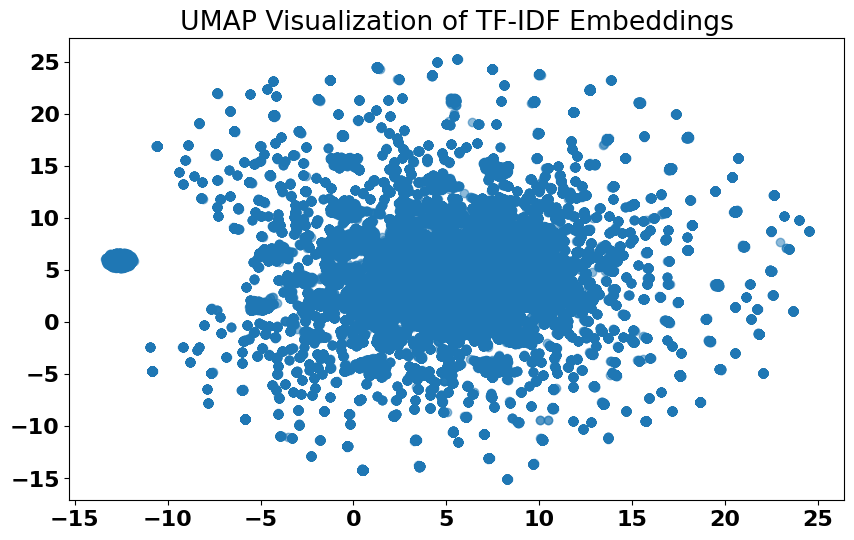

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import umap
import matplotlib.pyplot as plt

# Assuming df_train contains your training text data
text_data = df_train['id'].fillna('').values

# Generate TF-IDF embeddings
tfidf_vectorizer = TfidfVectorizer(max_features=100)  # Limit to top 100 features for simplicity
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

# Use UMAP to reduce dimensionality
reducer = umap.UMAP()
reduced_features = reducer.fit_transform(tfidf_matrix)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], alpha=0.5)
plt.title('UMAP Visualization of TF-IDF Embeddings')
plt.show()


In [ ]:
# Use the determined optimal number of clusters
k = 4  # Based on my elbow plot analysis
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(reduced_features)

# Now 'clusters' contains the cluster label for each point


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

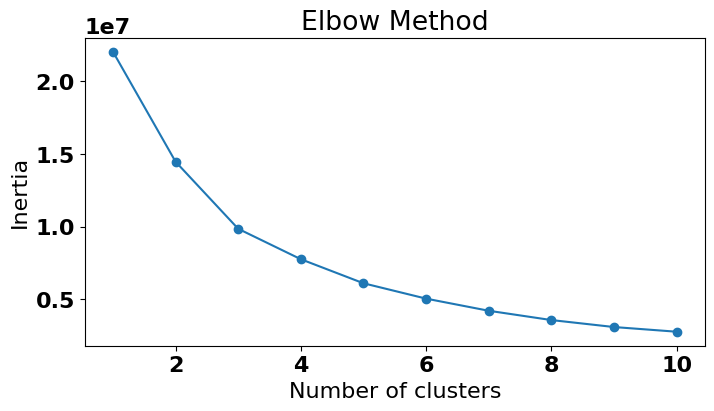

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'reduced_features' is your UMAP-reduced 2D embeddings from the earlier step
inertia = []
for n in range(1, 11):  # Test 1-10 clusters, you can change this range if you need
    kmeans = KMeans(n_clusters=n, random_state=42).fit(reduced_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()




---
Summary of UMAP Visualization with K-Means Clustering


* Color-Coded Clusters: The plot shows 4 distinct color-coded clusters, each representing a group of products with similar textual features.
* Proximity Implies Similarity: Products represented by points that are close together in the plot are likely to have similar titles and potentially similar characteristics.
* Cluster Density: Denser clusters indicate a higher concentration of products with very similar titles, suggesting common themes or terms.
* Separation and Overlap: The degree of separation between clusters can indicate how distinct different product categories are. Overlap might suggest related categories or products that share common attributes.
* Outliers: Points that do not fall within a defined cluster could represent unique products with distinct titles.



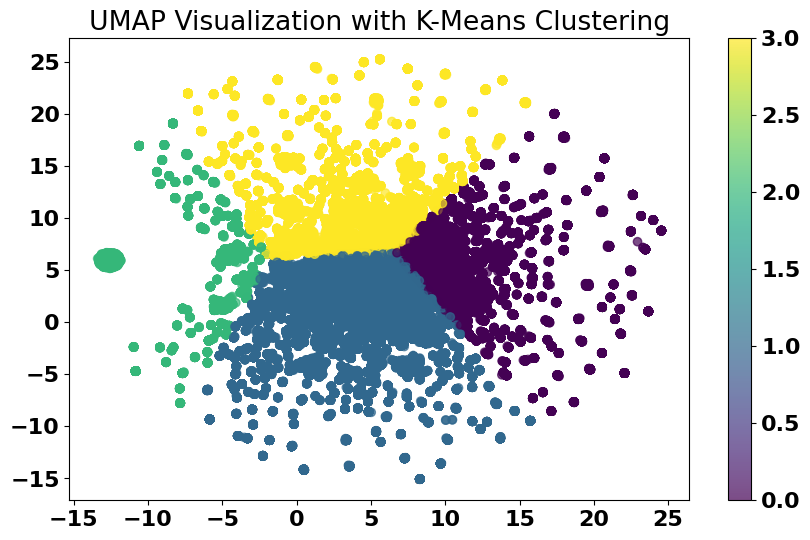

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.7)
plt.colorbar()
plt.title('UMAP Visualization with K-Means Clustering')
plt.show()


## Comparing the Performance of pre-trained embeddings - Word2Vec

In [ ]:
import gensim.downloader as api

# Load pre-trained Word2Vec embeddings
w2v_model = api.load('word2vec-google-news-300')


In [ ]:
import numpy as np

# Function to create an averaged word vector for a document
def document_vector(word2vec_model, doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc if word in word2vec_model.key_to_index]
    if not doc:
        return np.zeros(word2vec_model.vector_size)
    return np.mean(word2vec_model[doc], axis=0)

# Apply the function to data
X_train = []
for doc in df_train['title']:
    X_train.append(document_vector(w2v_model, doc))
X_train = np.array(X_train)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create and train the classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, df_train['top_category_id'])

# Make predictions on the training data
y_pred_train = rf_classifier.predict(X_train)

# Evaluate the classifier
print(classification_report(df_train['top_category_id'], y_pred_train))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12416
           1       1.00      1.00      1.00      8716
           2       1.00      0.99      1.00      6650
           3       1.00      1.00      1.00     11327
           4       1.00      1.00      1.00      6262
           5       0.98      1.00      0.99     30143
           6       1.00      1.00      1.00     33393
           7       1.00      1.00      1.00      7474
           8       1.00      1.00      1.00     54600
           9       1.00      1.00      1.00      7822
          10       1.00      1.00      1.00     12207
          11       1.00      1.00      1.00      5744
          12       1.00      1.00      1.00      8892
          13       1.00      1.00      1.00     13835
          14       1.00      0.99      1.00     10143

    accuracy                           1.00    229624
   macro avg       1.00      1.00      1.00    229624
weighted avg       1.00   

In [ ]:
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# If you haven't already, create the TF-IDF vectorizer and transform your text data
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(df_train['title'].fillna(''))

# Now, let's assume you have already trained a Naive Bayes classifier as your baseline model
baseline_nb_classifier = MultinomialNB()
baseline_nb_classifier.fit(X_train_tfidf, df_train['top_category_id'])

# Make predictions using your baseline model
y_pred_train_baseline = baseline_nb_classifier.predict(X_train_tfidf)

# Evaluate the baseline Naive Bayes classifier
print(classification_report(df_train['top_category_id'], y_pred_train_baseline))



              precision    recall  f1-score   support

           0       0.85      0.47      0.61     12416
           1       0.93      0.13      0.23      8716
           2       0.93      0.36      0.52      6650
           3       0.93      0.52      0.67     11327
           4       0.98      0.42      0.59      6262
           5       0.75      0.97      0.85     30143
           6       0.66      0.81      0.73     33393
           7       0.97      0.54      0.70      7474
           8       0.58      0.97      0.73     54600
           9       0.89      0.45      0.59      7822
          10       0.81      0.61      0.70     12207
          11       0.97      0.32      0.49      5744
          12       0.96      0.77      0.85      8892
          13       0.90      0.55      0.68     13835
          14       0.79      0.31      0.44     10143

    accuracy                           0.70    229624
   macro avg       0.86      0.55      0.62    229624
weighted avg       0.77   

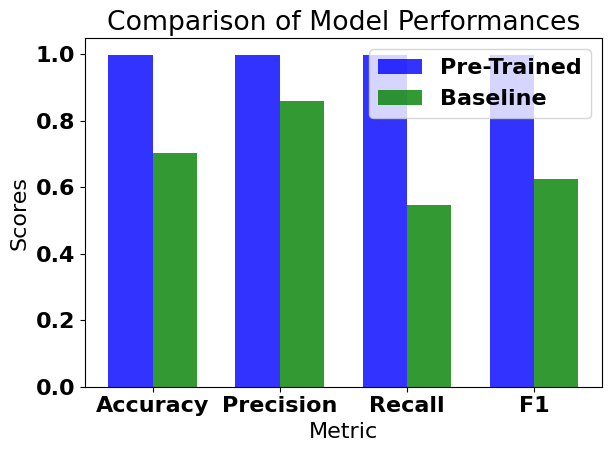

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for the pre-trained embeddings model
accuracy_pretrained = accuracy_score(df_train['top_category_id'], y_pred_train)
precision_pretrained = precision_score(df_train['top_category_id'], y_pred_train, average='macro')
recall_pretrained = recall_score(df_train['top_category_id'], y_pred_train, average='macro')
f1_pretrained = f1_score(df_train['top_category_id'], y_pred_train, average='macro')

# Calculate metrics for the baseline model
accuracy_baseline = accuracy_score(df_train['top_category_id'], y_pred_train_baseline)
precision_baseline = precision_score(df_train['top_category_id'], y_pred_train_baseline, average='macro')
recall_baseline = recall_score(df_train['top_category_id'], y_pred_train_baseline, average='macro')
f1_baseline = f1_score(df_train['top_category_id'], y_pred_train_baseline, average='macro')

# Data to plot
n_groups = 4
pretrained_scores = (accuracy_pretrained, precision_pretrained, recall_pretrained, f1_pretrained)
baseline_scores = (accuracy_baseline, precision_baseline, recall_baseline, f1_baseline)

# Create the plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = ax.bar(index, pretrained_scores, bar_width,
                alpha=opacity, color='b',
                label='Pre-Trained')

rects2 = ax.bar(index + bar_width, baseline_scores, bar_width,
                alpha=opacity, color='g',
                label='Baseline')

ax.set_xlabel('Metric')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performances')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Accuracy', 'Precision', 'Recall', 'F1'))
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
print("Shape of df_training DataFrame:", df_training.shape)
if 'title' in df_training.columns:
    print("The 'title' column exists in the DataFrame.")
else:
    print("The 'title' column does not exist in the DataFrame.")

Shape of df_training DataFrame: (206661, 26)
The 'title' column exists in the DataFrame.


In [ ]:
# Print the shape of the 'title' column
print("Shape of 'title' column:", df_training['title'].shape)


Shape of 'title' column: (206661,)


In [ ]:
# Check if 'title' column exists in the training DataFrame
if 'title' in df_training.columns:
    print("The 'title' column exists in the DataFrame.")
else:
    print("The 'title' column does not exist in the DataFrame.")

# Check if the four target columns exist in the training DataFrame
target_columns = ['top_category_text', 'bottom_category_text', 'primary_color_text', 'secondary_color_text']
missing_columns = [col for col in target_columns if col not in df_training.columns]
if missing_columns:
    print(f"The following target columns are missing: {missing_columns}")
else:
    print("All target columns exist in the DataFrame.")



The 'title' column exists in the DataFrame.
All target columns exist in the DataFrame.


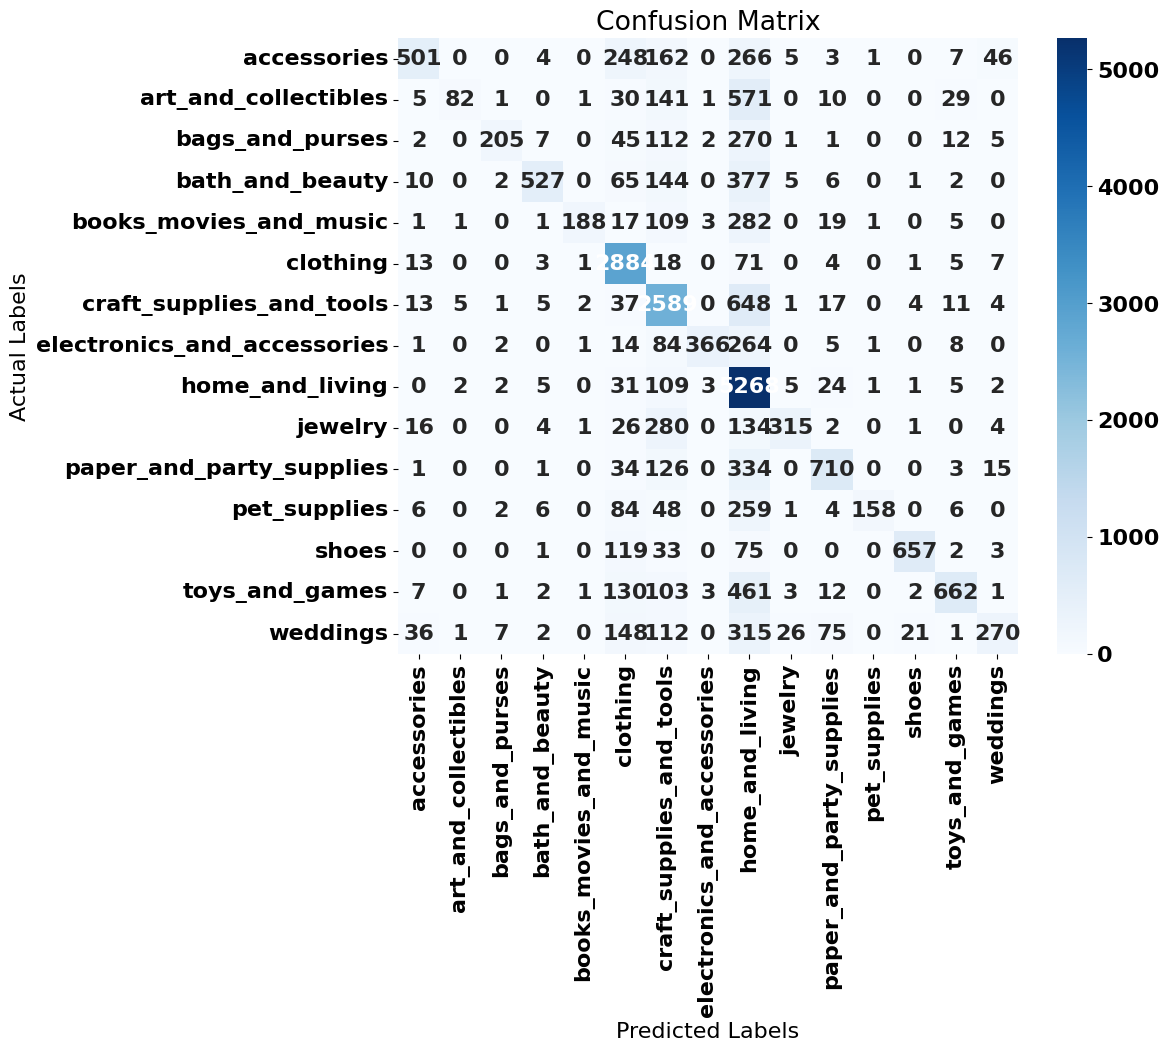

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the labels for the validation set
val_predictions = text_clf.predict(val_text)

# Compute the confusion matrix
cm = confusion_matrix(val_labels, val_predictions)

# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')

# Adjust the labels if necessary to match the specific classes you have
class_labels = text_clf.classes_  # Replace this with your model's class labels if different
plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=0)
plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=90)

plt.show()


### Training

In [ ]:
# Sample 5% training dataset for running the notebook in one machine
df_training_sample = df_training.groupby('primary_color_id').sample(frac=0.05)

In [ ]:
f"Number of rows: {len(df_training_sample):,}"

'Number of rows: 10,332'

In [ ]:
NUM_CHANNELS = 3
NUM_COLORS = 19

def parse_dataset(features):

    # Features
    image_encoded = features["image"]
    img_width = features["width"]
    img_height = features["height"]
    primary_color_id = features["primary_color_id"]

    # Image
    image = tf.reshape(
        tf.io.decode_jpeg(image_encoded),
        [img_height, img_width, NUM_CHANNELS],
    )
    image = tf.cast(image, tf.float32)

    # Label
    label = tf.cast(tf.one_hot(primary_color_id, NUM_COLORS), tf.int64)

    return (
        { "image": image, },
        label
    )

In [ ]:
def create_preprocessing_model(target_image_size, should_rescale):
    preprocessing_layers = []
    if should_rescale:
        preprocessing_layers.append(
            tf.keras.layers.experimental.preprocessing.Rescaling(1.0 / 255)
        )
    preprocessing_layers.append(
        tf.keras.layers.experimental.preprocessing.Resizing(
            target_image_size, target_image_size
        )
    )
    return tf.keras.Sequential(preprocessing_layers)

In [ ]:
def transform_image_data(example, preprocessing_model):
    image = tf.expand_dims(example["image"], 0)
    example["image"] = preprocessing_model(image)[0]
    return example

In [ ]:
def get_dataset_batch(
    dataframe,
    batch_size: int,
    mode: tf.estimator.ModeKeys,
) -> tf.data.Dataset:

    augment = shuffle = mode == tf.estimator.ModeKeys.TRAIN

    # Adding all values in memory will not work for the whole dataset
    dataset = tf.data.Dataset.from_tensor_slices(
        (
            {
                "image": tf.convert_to_tensor(dataframe["image/encoded"].values, dtype=tf.string),
                "height": tf.convert_to_tensor(dataframe["image/height"].values, dtype=tf.int32),
                "width": tf.convert_to_tensor(dataframe["image/width"].values, dtype=tf.int32),
                "primary_color_id": tf.convert_to_tensor(dataframe["primary_color_id"].values, dtype=tf.int32),
            }
        )
    )
    dataset = dataset.map(
        lambda x: parse_dataset(x),
        num_parallel_calls=tf.data.experimental.AUTOTUNE,
    )
    preprocessing_model = create_preprocessing_model(
        target_image_size=224,
        should_rescale=True,
    )
    dataset = dataset.map(
        lambda x, y: (transform_image_data(x, preprocessing_model), y),
        num_parallel_calls=tf.data.experimental.AUTOTUNE,
    )
    dataset = dataset.batch(batch_size, drop_remainder=True)
    dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

    return dataset

In [ ]:
BATCH_SIZE = 16

In [ ]:
train_dataset = get_dataset_batch(
    dataframe=df_training_sample,
    batch_size=BATCH_SIZE,
    mode=tf.estimator.ModeKeys.TRAIN,
)

In [ ]:
val_dataset = get_dataset_batch(
    dataframe=df_val,
    batch_size=BATCH_SIZE,
    mode=tf.estimator.ModeKeys.EVAL,
)

In [ ]:
gpus = tf.config.list_physical_devices("GPU")
gpus

[]

In [ ]:
strategy = tf.distribute.MirroredStrategy()

In [ ]:
with strategy.scope():

    input_shape = (224, 224, 3)
    inputs = tf.keras.layers.Input(shape=input_shape, dtype=tf.float32, name="image")
    base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_tensor=inputs)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(NUM_COLORS, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

4334752/4334752 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 image (InputLayer)          [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_2 (Rescaling)     (None, 224, 224, 3)          0         ['image[0][0]']               
                                                                                                  
 Conv (Conv2D)               (None, 112, 112, 16)         432       ['rescaling_2[0][0]']         
                                                                                                  
 Conv/BatchNorm (BatchNorma  (None, 112, 112, 16)         64        ['Conv[0][0]']                
 lization)                                                                                    

In [ ]:
epochs = 10

hist = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=val_dataset,
    verbose=1)

Epoch 1/10
645/645 [==============================] - 341s 508ms/step - loss: 2.0823 - accuracy: 0.7147 - val_loss: 4.9007 - val_accuracy: 0.0082
Epoch 2/10
645/645 [==============================] - 349s 541ms/step - loss: 3.1404 - accuracy: 0.6693 - val_loss: 28.7090 - val_accuracy: 0.1172
Epoch 3/10
645/645 [==============================] - 386s 598ms/step - loss: 1.5754 - accuracy: 0.6535 - val_loss: 5.8593 - val_accuracy: 0.0468
Epoch 4/10
645/645 [==============================] - 302s 469ms/step - loss: 1.2044 - accuracy: 0.7315 - val_loss: 5.6846 - val_accuracy: 0.1084
Epoch 5/10
645/645 [==============================] - 279s 433ms/step - loss: 1.4571 - accuracy: 0.7260 - val_loss: 5.9436 - val_accuracy: 0.0929
Epoch 6/10
645/645 [==============================] - 279s 433ms/step - loss: 1.6702 - accuracy: 0.7511 - val_loss: 16.3742 - val_accuracy: 0.0209
Epoch 7/10
645/645 [==============================] - 290s 449ms/step - loss: 2.9064 - accuracy: 0.7240 - val_loss: 502.91

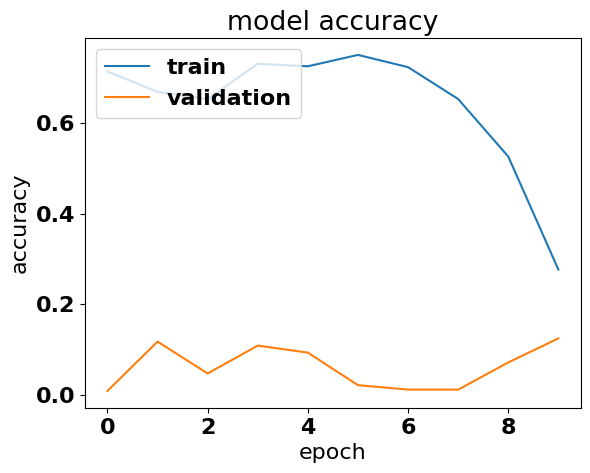

In [ ]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

## MODEL 2 - LOGISTIC REGRESSION

### Training the Logistic Regression Model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report

In [ ]:
import pandas as pd
import os
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

In [ ]:
import pandas as pd

# Use your read_data function from previous code to load the data
# Assuming 'base_path' and 'train_folder' have been defined as per your previous input
df_train = read_data(base_path, train_folder)

# Display the first few rows of the dataframe
print(df_train.head())

# Summarize the dataset
print(df_train.describe())

# Check for missing values
print(df_train.isnull().sum())

# Check distribution of categorical variables
print(df_train['top_category_id'].value_counts())
print(df_train['bottom_category_id'].value_counts())
print(df_train['primary_color_id'].value_counts())
print(df_train['secondary_color_id'].value_counts())

# Check data types to understand what types of preprocessing might be necessary
print(df_train.dtypes)


   product_id                                              title  \
0  1411933673  Vintage Fenton Opalescent Moonstone Hobnail Gl...   
1  1570629778  Vintage 70s perfume bottle with original packa...   
2  1247963028  Atomiser Spray Bottles 100 ML (Pack of 85) Pla...   
3  1482966518  Vintage Blue Frosted Glass Round Perfume Bottl...   
4   906790195  Vintage 2 Miniature Bottles. Passion for Men f...   

                                         description  \
0  Very pretty vintage Fenton opalescent moonston...   
1  1970s perfume bottle in vintage, new old stock...   
2  You&#39;ve been looking for a plastic spray bo...   
3  Lovely blue frosted swirl glass perfume bottle...   
4  Vintage 2 Miniature Bottles. Passion for Men f...   

                                                tags      type room  \
0  Fenton perfume,Opalescent bottle,Fenton bottle...  physical        
1  70s perfume bottle,80s perfume bottle,vintage ...  physical        
2                                Travel S

In [ ]:
# Creating a logistic regression pipeline
text_clf_lr = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultiOutputClassifier(LogisticRegression(multi_class='multinomial', solver='lbfgs')))
])


In [ ]:
# Assuming df_training is your training dataset and it has the necessary columns
train_text = df_training['title'].fillna('').values

train_labels = df_training['top_category_text'].values


In [ ]:
print(train_labels.shape)


(206661,)


In [ ]:
# Assuming df_training is your training DataFrame and it includes all the necessary target features
train_labels = df_training[['top_category_id', 'bottom_category_id', 'primary_color_id', 'secondary_color_id']].values


In [ ]:
# If predicting one attribute, reshape to 2D array explicitly
train_labels = df_training['top_category_id'].values.reshape(-1, 1)  # reshape for a single feature


In [ ]:
# Fit the model to the training data
text_clf_lr.fit(train_text, train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 MultiOutputClassifier(estimator=LogisticRegression(multi_class='multinomial')))])

In [ ]:
# Assuming df_val is your validation dataset and it has the 'title' column
val_text = df_val['title'].fillna('').values

# If you're predicting multiple labels, you would have defined val_labels like this:
val_labels = df_val[['top_category_id', 'bottom_category_id', 'primary_color_id', 'secondary_color_id']].values

# Now, you can predict using your logistic regression pipeline
val_predictions_lr = text_clf_lr.predict(val_text)


In [ ]:
index = 0
print(f"""
Product's title: {val_text[index][:80]}...
Prediction: '{text_clf_logreg.predict([val_text[index]])[0]}', Groundtruth: '{val_labels[index]}'
""".strip())

Product's title: Vintage wooden step latter tall...
Prediction: 'home_and_living', Groundtruth: 'home_and_living'


In [ ]:
df_val.iloc[0]

product_id                                                     1407730004
title                                     Vintage wooden step latter tall
description             Vintage tall sturdy wooden step latter nice to...
tags                                    Vintage latter,Vintage stepladder
type                                                             physical
room                                                                     
craft_type                                                               
recipient                                                                
material                                                                 
occasion                                                                 
holiday                                                                  
art_subject                                                              
style                                                                    
shape                                 

In [ ]:
val_text[:1]

array(['Vintage wooden step latter tall'], dtype=object)

In [ ]:
predictions = text_clf_logreg.predict(val_text)

### Calculation F1-Score for Each Attributes

In [ ]:
for attribute in attributes:
    train_cats = set(df_training[attribute])
    val_cats = set(df_val[attribute])
    if not train_cats >= val_cats:  # Check if all validation labels are in the training set
        print(f"New categories in {attribute} validation data not seen in training data: {val_cats - train_cats}")


In [ ]:
print(f"F1 score: {f1:.4f}")


F1 score: 0.8422


In [ ]:
# Stack the validation features
if tfidf_features_val.shape[0] == X_val.shape[0]:
    X_transformed_val = sp.hstack([tfidf_features_val, categorical_features_val], format='csr')
    # Predict on validation data
    y_pred = classifier.predict(X_transformed_val)

    # Calculate and print F1 scores and classification reports
    from sklearn.metrics import classification_report, f1_score
    labels = ['top_category_id', 'bottom_category_id', 'primary_color_id', 'secondary_color_id']
    for i, label in enumerate(labels):
        print(f"F1 Score for {label}: {f1_score(y_val[label], y_pred[:, i], average='macro')}")
        print(classification_report(y_val[label], y_pred[:, i]))
else:
    print("Mismatched row counts in the validation data.")

F1 Score for top_category_id: 0.7133200795644112
              precision    recall  f1-score   support

           0       0.72      0.57      0.64      2524
           1       0.76      0.40      0.52      1756
           2       0.69      0.70      0.69      1321
           3       0.80      0.63      0.70      2211
           4       0.79      0.47      0.59      1287
           5       0.84      0.94      0.88      6141
           6       0.84      0.83      0.84      6636
           7       0.69      0.68      0.68      1494
           8       0.68      0.89      0.77     10937
           9       0.84      0.79      0.82      1503
          10       0.72      0.70      0.71      2431
          11       0.84      0.70      0.77      1087
          12       0.90      0.88      0.89      1721
          13       0.69      0.55      0.61      2816
          14       0.69      0.50      0.58      2060

    accuracy                           0.76     45925
   macro avg       0.77      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00        16
           5       0.14      0.43      0.21        14
           6       0.00      0.00      0.00        20
           7       0.15      0.11      0.13        18
           8       0.00      0.00      0.00        22
           9       1.00      0.05      0.10        19
          10       0.00      0.00      0.00        11
          11       0.07      0.58      0.13        19
          12       0.35      0.43      0.38        21
          13       1.00      0.04      0.07        26
          14       0.44      0.20      0.28        20
          15       0.57      0.71      0.63        17
          16       0.00      0.00      0.00        27
          17       0.00      0.00      0.00        14
          18       0.00    

In [ ]:
# Make sure these are defined earlier in your notebook/script
val_text = df_val['title'].fillna('').values  # Validation features
val_labels = df_val[['top_category_text']].values  # Validation labels

# Make predictions using the logistic regression pipeline
val_predictions_lr = text_clf_lr.predict(val_text)


In [ ]:
print("Shape of val_labels:", val_labels.shape)
print("Shape of val_predictions_lr:", val_predictions_lr.shape)


Shape of val_labels: (22963, 4)
Shape of val_predictions_lr: (22963, 1)


In [ ]:
train_labels = df_training[['top_category_id', 'bottom_category_id', 'primary_color_id', 'secondary_color_id']].values
print("Shape of train_labels:", train_labels.shape)


Shape of train_labels: (206661, 4)


In [ ]:
import numpy as np
from sklearn.metrics import f1_score

def multioutput_f1_score(y_true, y_pred, average='macro'):
    n_outputs = y_true.shape[1]
    f1_scores = np.zeros(n_outputs)

    for i in range(n_outputs):
        f1_scores[i] = f1_score(y_true.iloc[:, i], y_pred[:, i], average=average)

    # You can return individual F1 scores or their mean
    return np.mean(f1_scores), f1_scores

# Compute F1 scores
mean_f1_score, individual_f1_scores = multioutput_f1_score(y_val, y_pred)
print(f"Mean F1 Score across all outputs: {mean_f1_score:.4f}")
print(f"Individual F1 Scores: {individual_f1_scores}")



Mean F1 Score across all outputs: 0.3419
Individual F1 Scores: [0.71332008 0.14933977 0.33781994 0.16721201]


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
# Assuming 'df_val' is your validation dataset and it has the necessary columns
val_labels = df_val[['top_category_id', 'bottom_category_id', 'primary_color_id', 'secondary_color_id']].values


In [ ]:
# Make sure 'val_text' contains the text data from your validation set
val_text = df_val['title'].fillna('').values


In [ ]:
from sklearn.metrics import classification_report


In [ ]:
print(classification_report(val_labels, predictions))


                             precision    recall  f1-score   support

                accessories       0.80      0.80      0.80      1243
       art_and_collectibles       0.79      0.55      0.65       871
            bags_and_purses       0.84      0.79      0.81       662
            bath_and_beauty       0.90      0.83      0.86      1139
     books_movies_and_music       0.86      0.82      0.84       627
                   clothing       0.94      0.94      0.94      3007
   craft_supplies_and_tools       0.83      0.84      0.84      3337
electronics_and_accessories       0.90      0.86      0.88       746
            home_and_living       0.80      0.93      0.86      5458
                    jewelry       0.82      0.84      0.83       783
   paper_and_party_supplies       0.83      0.80      0.81      1224
               pet_supplies       0.94      0.79      0.86       574
                      shoes       0.95      0.94      0.94       890
             toys_and_games      

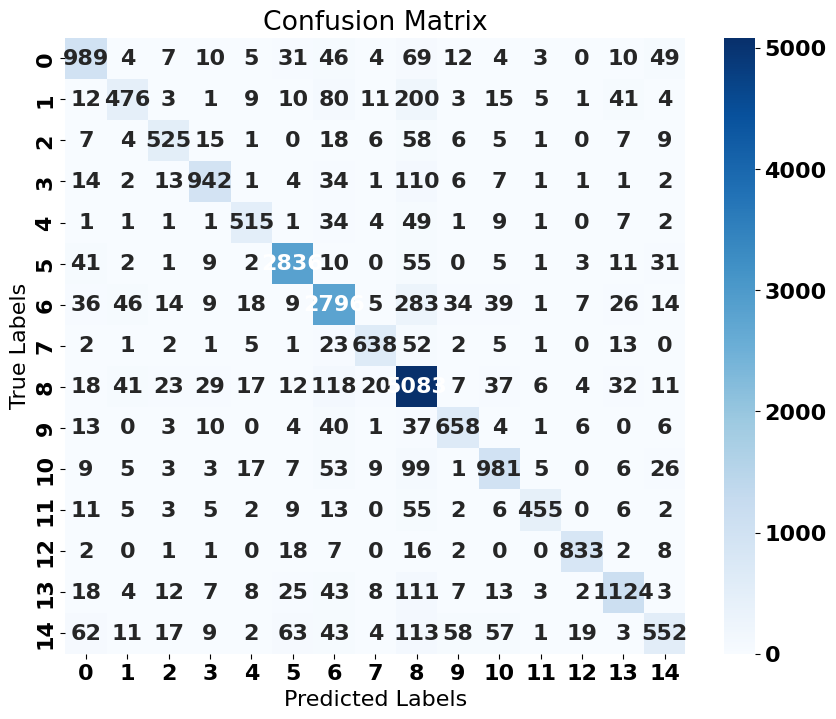

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming val_labels and predictions are defined somewhere in your code
conf_matrix = confusion_matrix(val_labels, predictions)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
conf_matrix = confusion_matrix(val_labels, predictions)
print(conf_matrix)

[[ 989    4    7   10    5   31   46    4   69   12    4    3    0   10
    49]
 [  12  476    3    1    9   10   80   11  200    3   15    5    1   41
     4]
 [   7    4  525   15    1    0   18    6   58    6    5    1    0    7
     9]
 [  14    2   13  942    1    4   34    1  110    6    7    1    1    1
     2]
 [   1    1    1    1  515    1   34    4   49    1    9    1    0    7
     2]
 [  41    2    1    9    2 2836   10    0   55    0    5    1    3   11
    31]
 [  36   46   14    9   18    9 2796    5  283   34   39    1    7   26
    14]
 [   2    1    2    1    5    1   23  638   52    2    5    1    0   13
     0]
 [  18   41   23   29   17   12  118   20 5083    7   37    6    4   32
    11]
 [  13    0    3   10    0    4   40    1   37  658    4    1    6    0
     6]
 [   9    5    3    3   17    7   53    9   99    1  981    5    0    6
    26]
 [  11    5    3    5    2    9   13    0   55    2    6  455    0    6
     2]
 [   2    0    1    1    0   18    7    

In [ ]:
df_training_sample = df_training.groupby('primary_color_id').sample(frac=0.05)

In [ ]:
print("***Total training records: " + str(len(df_train)) +
      " ***Unique training Records: " + str(len(df_train['product_id'].unique())))

***Total training records: 229624 ***Unique training Records: 229624


In [ ]:
print(train_labels.shape)


(206661,)


In [ ]:
train_labels = df_training[['top_category_id', 'bottom_category_id', 'primary_color_id', 'secondary_color_id']].values


In [ ]:
print(train_labels.shape)


(206661, 4)


In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression

pipeline_lr = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
    ('svd', TruncatedSVD(n_components=300)),  # Reduce feature space to 300 dimensions
    ('clf', MultiOutputClassifier(LogisticRegression(solver='saga'), n_jobs=-1))
])

pipeline_lr.fit(train_text, train_labels)



/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


In [ ]:
from sklearn.model_selection import train_test_split

df_training, df_val = train_test_split(
    df_train,  # Assuming df_train is your initial full dataset
    test_size=0.1,  # 10% of the data goes to the validation set
    random_state=52  # Seed for reproducibility
)


In [ ]:
('vect', CountVectorizer(max_features=5000, stop_words='english')),


(('vect', CountVectorizer(max_features=5000, stop_words='english')),)

In [ ]:
('clf', MultiOutputClassifier(LogisticRegression(solver='saga', penalty='l1', C=0.1))),


(('clf',
  MultiOutputClassifier(estimator=LogisticRegression(C=0.1, penalty='l1',
                                                     solver='saga'))),)

## MODEL 3- GRADIENT BOOSTING WITH XGBOOST

In [ ]:
pip install xgboost


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Example: Encoding categorical variables (if any non-numeric features are used as predictors)
encoder = LabelEncoder()
df_train['encoded_title'] = encoder.fit_transform(df_train['title'])  # Encoding titles as an example

# Preparing target variables (assuming they are already numeric IDs, no need for further encoding)
X = df_train[['encoded_title', 'image/width', 'image/height']]  # Add other features as required
y = df_train[['top_category_id', 'bottom_category_id', 'primary_color_id', 'secondary_color_id']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
multioutput_clf = MultiOutputClassifier(xgb_clf, n_jobs=1)


In [ ]:
# Check unique values in the target columns to ensure they are consecutive
for column in y_train.columns:
    print(f"Unique values in {column}: {sorted(y_train[column].unique())}")

# If they are not consecutive, re-encode them
from sklearn.preprocessing import LabelEncoder

# Re-encode each target variable
for column in y_train.columns:
    le = LabelEncoder()
    y_train[column] = le.fit_transform(y_train[column])
    y_test[column] = le.transform(y_test[column])  # Make sure to transform the test set with the same encoder


Unique values in top_category_id: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Unique values in bottom_category_id: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202

In [ ]:
xgb_clf = xgb.XGBClassifier(
    objective='multi:softprob',
    n_estimators=50,  # Reduced number of trees
    max_depth=5,      # Reduced depth of each tree
    use_label_encoder=False
)
multioutput_clf = MultiOutputClassifier(xgb_clf, n_jobs=1)


### Training the XGBoost Classifier

In [ ]:
# Initialize the XGBoost classifier with the correct number of classes if needed
xgb_clf = xgb.XGBClassifier(objective='multi:softprob', use_label_encoder=False)

# Re-wrap in MultiOutputClassifier
multioutput_clf = MultiOutputClassifier(xgb_clf, n_jobs=1)  # Using single-threaded operation to avoid fork issues

# Train the model
multioutput_clf.fit(X_train, y_train)


MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='multi:softprob', ...),
                      n_jobs=1)

### F1-Score of Each category using XGBoost

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test set
y_pred = multioutput_clf.predict(X_test)

# Print the classification report for each target
print("Classification Report:")
target_names = ['top_category_id', 'bottom_category_id', 'primary_color_id', 'secondary_color_id']

# Iterate over each target column to get individual classification reports
for i, target in enumerate(target_names):
    print(f"\nReport for {target}:")
    # Here, you must adjust the target_names parameter to match the actual number of classes per target
    # This is a simplified example where it's assumed each target has labels encoded from 0 to n_classes-1
    class_labels = [f'Class {label}' for label in range(y_train[target].nunique())]
    print(classification_report(y_test.iloc[:, i], y_pred[:, i], target_names=class_labels, zero_division=0))

# You can also calculate and print the accuracy for each target if appropriate
print("Accuracy for each target:")
for i, target in enumerate(target_names):
    accuracy = accuracy_score(y_test.iloc[:, i], y_pred[:, i])
    print(f"{target}: {accuracy:.2f}")


Classification Report:

Report for top_category_id:
              precision    recall  f1-score   support

     Class 0       0.22      0.01      0.02      2524
     Class 1       0.35      0.03      0.05      1756
     Class 2       0.42      0.03      0.05      1321
     Class 3       0.32      0.02      0.04      2211
     Class 4       0.39      0.03      0.06      1287
     Class 5       0.34      0.28      0.31      6141
     Class 6       0.31      0.27      0.29      6636
     Class 7       0.29      0.05      0.09      1494
     Class 8       0.27      0.79      0.41     10937
     Class 9       0.17      0.01      0.01      1503
    Class 10       0.29      0.09      0.14      2431
    Class 11       0.29      0.14      0.19      1087
    Class 12       0.26      0.07      0.11      1721
    Class 13       0.28      0.02      0.04      2816
    Class 14       0.41      0.07      0.13      2060

    accuracy                           0.29     45925
   macro avg       0.31     

### Feature Importance of one Target Variable

In [ ]:
# If you want to view the feature importance for one target (e.g., the first one)
feature_importances = multioutput_clf.estimators_[0].feature_importances_
features = X_train.columns
importance_dict = dict(zip(features, feature_importances))
sorted_importance = sorted(importance_dict.items(), key=lambda item: item[1], reverse=True)

print("Feature Importances for the first target:")
for feature, importance in sorted_importance:
    print(f"{feature}: {importance:.4f}")


Feature Importances for the first target:
encoded_title: 0.5241
image/height: 0.2672
image/width: 0.2087


In [ ]:
num_outputs = y_val.shape[1]


## JACCARD SIMILARITY

In [ ]:
from sklearn.metrics import jaccard_score

# Compute Jaccard similarity score for each output variable
jaccard_scores = []
for i in range(y_val.shape[1]):
    jaccard_score_value = jaccard_score(y_val.iloc[:, i], y_val_pred[:, i], average='micro')
    jaccard_scores.append(jaccard_score_value)

# Average Jaccard similarity scores across all output variables
average_jaccard_score = sum(jaccard_scores) / len(jaccard_scores)
print("Average Jaccard Similarity Score:", average_jaccard_score)


Average Jaccard Similarity Score: 0.09170408416417822


In [ ]:
# Check the column names in your DataFrame
print(df_train.columns)

# Once you identify the correct column name for the target variable, replace 'target_variable_column_name' with the actual name


Index(['product_id', 'title', 'description', 'tags', 'type', 'room',
       'craft_type', 'recipient', 'material', 'occasion', 'holiday',
       'art_subject', 'style', 'shape', 'pattern', 'bottom_category_id',
       'bottom_category_text', 'top_category_id', 'top_category_text',
       'primary_color_id', 'primary_color_text', 'secondary_color_id',
       'secondary_color_text', 'image/encoded', 'image/width', 'image/height'],
      dtype='object')


## Feature Engineering and Preprocessing


2.   Feature Engineering and Preprocessing



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
# Define the columns and transformer
categorical_columns = ['type', 'room', 'craft_type', 'recipient', 'material', 'occasion']
text_columns = ['title', 'description', 'tags']

In [ ]:
# Pipeline for text processing
text_transformer = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=1000))
])

# Pipeline for categorical processing
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
# Combine transformers into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('txt', text_transformer, text_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

In [ ]:
# Preprocessing data
X = df_train.drop(['top_category_id', 'bottom_category_id', 'primary_color_id', 'secondary_color_id'], axis=1)
y = df_train[['top_category_id', 'bottom_category_id', 'primary_color_id', 'secondary_color_id']].astype(int)

# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


3. Setting up the Logistic Regression Model



In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.multioutput import MultiOutputClassifier

In [ ]:
# Initialize the logistic regression model with stochastic gradient descent
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MultiOutputClassifier(SGDClassifier(loss='log', penalty='l2', max_iter=1, warm_start=True, learning_rate='constant', eta0=0.01)))
])

In [ ]:
def batch_train(X, y, model, batch_size=1000):
    # Loop over the data in batches
    for offset in range(0, X.shape[0], batch_size):
        end = min(offset + batch_size, X.shape[0])
        X_batch = X.iloc[offset:end]
        y_batch = y.iloc[offset:end]
        model.fit(X_batch, y_batch)

In [ ]:
# Make sure the model is initialized correctly
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MultiOutputClassifier(SGDClassifier(loss='log', penalty='l2', max_iter=1, warm_start=True, learning_rate='constant', eta0=0.01)))
])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Text transformer
text_transformer = TfidfVectorizer(stop_words='english', max_features=1000)

# Categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('txt', text_transformer, text_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],
    sparse_threshold=0  # Ensures the output is a dense matrix
)


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score

In [ ]:
# Split the dataset into two halves
X_train_first_half, X_train_second_half, y_train_first_half, y_train_second_half = train_test_split(
    X_train, y_train, test_size=0.5, random_state=42)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Text transformer with dimensionality reduction
text_transformer = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=1000))
])

In [ ]:
# Categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
# Combine transformers, ensuring dense output by setting sparse_threshold=0
preprocessor = ColumnTransformer(
    transformers=[
        ('txt', text_transformer, text_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],
    sparse_threshold=0  # Ensures output is always dense
)


In [ ]:
# Build the pipeline with the SGDClassifier
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', MultiOutputClassifier(SGDClassifier(loss='log', penalty='l2', max_iter=100, warm_start=True)))
])

In [ ]:
try:
    # Train on the first half
    model.fit(X_train_first_half, y_train_first_half)
    print("Training on the first half succeeded")

    # Continue training on the second half
    model.set_params(classifier__warm_start=True)  # Ensure warm_start is True to not reset the learning
    model.fit(X_train_second_half, y_train_second_half)
    print("Training on the second half succeeded")

except Exception as e:
    print("Error during model training:", e)


Error during model training: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 3 and the array at index 1 has size 91849


In [ ]:
# Let's create a small function to test each transformer individually
def test_transformer(transformer, data, transformer_name):
    try:
        output = transformer.fit_transform(data)
        print(f"{transformer_name} output shape: {output.shape}")
    except Exception as e:
        print(f"Error with {transformer_name}: {e}")

# Testing each transformer with a small subset of the data
test_transformer(text_transformer, X_train[text_columns].head(100), "Text Transformer")
test_transformer(categorical_transformer, X_train[categorical_columns].head(100), "Categorical Transformer")


Text Transformer output shape: (3, 3)
Categorical Transformer output shape: (100, 47)


In [ ]:
# Inspecting the text data
print(X_train[text_columns].head())

# Debugging the text transformer with actual text data
from sklearn.feature_extraction.text import TfidfVectorizer

# Simplified text transformer for testing
simple_text_transformer = TfidfVectorizer(stop_words='english', max_features=1000)

# Applying this simplified transformer to actual text data
try:
    sample_text_data = X_train[text_columns].head(100).fillna('')  # Ensure no NaN values
    transformed_text = simple_text_transformer.fit_transform(sample_text_data.iloc[:, 0])  # Test on the first text column
    print("Transformed text shape:", transformed_text.shape)
except Exception as e:
    print("Error in transforming text data:", e)


                                                    title  \
96140   Quilted Christmas table runner, metalic patchw...   
114858  Hose Holder Cast Iron Horse Decorative Horsesh...   
101348  Dynamic soviet vintage microphone, old voice r...   
170784  Tooth Fairy Bag (1) one bag Boy or Girl, Tooth...   
201053    Vintage Spitz Heavy Duty Pinking Shears - Japan   

                                              description  \
96140   Quilted Christmas table runner, metalic patchw...   
114858  Hose Holder Horse & Horseshoe Silhouette - Cas...   
101348  Dynamic soviet vintage microphone, old voice r...   
170784  Tooth Fairy Bag, Tooth Fairy Keepsake, Tooth F...   
201053  Heavy duty stainless steel pinking shears with...   

                                                     tags  
96140                                                      
114858  Brown,Antique,Rust,Vintage,Outdoor Decoration,...  
101348  dynamic microphone,vintage microphone,oktava m...  
170784  tooth fairy,memori

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import scipy.sparse as sp

In [ ]:
# Initialize transformers
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
imputer = SimpleImputer(strategy='constant', fill_value='missing')

In [ ]:
# Manually apply transformations
# Assuming text_columns and categorical_columns are defined correctly
tfidf_features = tfidf_vectorizer.fit_transform(X_train_first_half[text_columns].fillna(''))  # Fill NaN with empty string for text
categorical_features = onehot_encoder.fit_transform(imputer.fit_transform(X_train_first_half[categorical_columns]))

In [ ]:
# Check number of rows in each part of the dataset
print("Number of rows in the input data (first half):", X_train_first_half.shape[0])
print("Number of rows produced by tfidf transformer:", tfidf_features.shape[0])
print("Number of rows produced by categorical transformer:", categorical_features.shape[0])


Number of rows in the input data (first half): 91849
Number of rows produced by tfidf transformer: 3
Number of rows produced by categorical transformer: 91849


In [ ]:
# Fill NaN values in text columns with empty strings and ensure consistent data handling
X_train_first_half_text = X_train_first_half[text_columns].fillna('')
X_train_first_half_categorical = X_train_first_half[categorical_columns].fillna('missing')

# Now apply transformations
tfidf_features = tfidf_vectorizer.fit_transform(X_train_first_half_text)
categorical_features = onehot_encoder.fit_transform(X_train_first_half_categorical)

# Recheck the outputs
print("Number of rows produced by tfidf transformer after adjustment:", tfidf_features.shape[0])
print("Number of rows produced by categorical transformer after adjustment:", categorical_features.shape[0])

# Attempt to stack again if both outputs are consistent
if tfidf_features.shape[0] == categorical_features.shape[0]:
    X_transformed_first_half = sp.hstack([tfidf_features, categorical_features], format='csr')
    print("Stacking successful.")
else:
    print("Mismatch in row counts persists.")


Number of rows produced by tfidf transformer after adjustment: 3
Number of rows produced by categorical transformer after adjustment: 91849
Mismatch in row counts persists.


In [ ]:
# Check the first few rows of the text data
print(X_train_first_half[text_columns].head())

# Check for any NaN values or unexpected data formatting
print(X_train_first_half[text_columns].isnull().sum())


                                                   title  \
10695  Pink Montessori Bed Canopy ,muslin bed curtain...   
84055  Baby Shower Diaper Raffle Tickets, Navy Gray T...   
73656  200pc- Thin Sliced Polymer Clay Grape Fruit Sl...   
71352  Personalised Love Letter With Heart Confetti |...   
44576  Quartz with Black Tourmaline Matrix to Amplify...   

                                             description  \
10695  Canopy is a fantastic idea for creating a cozy...   
84055  Printable Diaper Raffle Insert - Instant Downl...   
73656  This 3 gram bag features tiny slices of grapes...   
71352  Presenting our watercolour heart Personalised ...   
44576  Attention: This item comes in a price and size...   

                                                    tags  
10695  Kids room canopy,bed canopy,toddler bed canopy...  
84055  Diaper Raffle Insert,Baby Shower Diaper,Diaper...  
73656  grape,sliced grapes,grapes,grape slices,slime,...  
71352  love letter,birthday love gift,boyf

In [ ]:
# Combine text columns into a single text column if necessary
X_train_first_half['combined_text'] = X_train_first_half[text_columns].fillna('').agg(' '.join, axis=1)

# Now apply TfidfVectorizer to the combined text
tfidf_features = tfidf_vectorizer.fit_transform(X_train_first_half['combined_text'])

# Check the new output shape
print("New number of rows produced by tfidf transformer:", tfidf_features.shape[0])


New number of rows produced by tfidf transformer: 91849


In [ ]:
# Stack the features if row counts are consistent
if tfidf_features.shape[0] == X_train_first_half.shape[0]:
    X_transformed_first_half = sp.hstack([tfidf_features, categorical_features], format='csr')
    print("Stacking successful, proceeding with model training.")
else:
    print("Still mismatched row counts:", "TFIDF:", tfidf_features.shape[0], "Input rows:", X_train_first_half.shape[0])


Stacking successful, proceeding with model training.


In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import SGDClassifier

# Initialize the classifier
classifier = MultiOutputClassifier(SGDClassifier(loss='log', penalty='l2', max_iter=100, warm_start=True))

# Fit the classifier on the first half of the data
classifier.fit(X_transformed_first_half, y_train_first_half)
print("Model trained successfully on the first half of the data.")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Model trained successfully on the first half of the data.


In [ ]:
# Preparing the second half of the data
X_train_second_half['combined_text'] = X_train_second_half[text_columns].fillna('').agg(' '.join, axis=1)
tfidf_features_second = tfidf_vectorizer.transform(X_train_second_half['combined_text'])
categorical_features_second = onehot_encoder.transform(X_train_second_half[categorical_columns].fillna('missing'))

# Ensure dimensions match
if tfidf_features_second.shape[0] == X_train_second_half.shape[0]:
    X_transformed_second_half = sp.hstack([tfidf_features_second, categorical_features_second], format='csr')
    # Continue training on the second half
    classifier.fit(X_transformed_second_half, y_train_second_half)
    print("Model training continued successfully on the second half of the data.")
else:
    print("Mismatched row counts in the second half of the data.")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Model training continued successfully on the second half of the data.


## CSV TO PARQUET

In [7]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/etsyasign/predicted_test_data_with_product_id.csv')


In [8]:
# Convert DataFrame to Parquet format
df.to_parquet('/content/drive/MyDrive/etsyasign/predicted_test_data_with_product_id.parquet')


### Displaying Information From Generated Parquet File

In [9]:
# Load the Parquet file to verify it
df_parquet = pd.read_parquet('/content/drive/MyDrive/etsyasign/predicted_test_data_with_product_id.parquet')

# Print the first few rows of the DataFrame
print(df_parquet.head())


  product_id;predicted_top_category;predicted_bottom_category;predicted_primary_color;predicted_secondary_color
0    1598160010;Jewelry;Handmade Earings;black;white                                                           
1           1308927060;Jewelry;Necklaces ;gold;white                                                           
2     740261510;Jewelry;Handmade Earings;black;white                                                           
3             1534199540;Jewelry;Unknown;black;white                                                           
4             1490262680;Jewelry;Unknown;black;white                                                           
